In [ ]:
# from google.colab import files
# uploaded = files.upload()

# <font color='#edca82'>***Imports***</font>


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.preprocessing import quantile_transform
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm
from prettytable import PrettyTable
from statsmodels.stats import multitest
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



# edca82 097770 f5beb4

# <font color='#edca82'>***Lung Analysis***</font>


## <font color='#097770'>***I. Extracting Datasets***</font>

### <font color='#f5beb4'>***A. Normal Lung Dataset***</font>

In [ ]:
# Define the file path for the normal lung dataset
path_to_normal_txt = 'lusc-rsem-fpkm-tcga_paired.txt'

# Load the data from the TXT file into a DataFrame
# We assume that the data is tab-separated (sep='\t')
normal_lung_df = pd.read_csv(path_to_normal_txt, sep='\t')

# Print the shape (dimensions) of the Normal Lung Dataset
print(f'Shape of Normal Lung Dataset: {normal_lung_df.shape}\n')

# Separator line for clarity
print('----------------------------------------------\n')

normal_lung_df

# Now, the 'normal_lung_df' DataFrame contains the data from the specified file

Shape of Normal Lung Dataset: (19648, 52)

----------------------------------------------



,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,...,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
19644,RP1-66C13.4,0,0.00,0.00,1.79,3.32,0.00,0.00,1.79,0.00,...,0.00,4.86,0.00,0.00,2.81,2.84,0.00,0.00,1.08,0.00
19645,C3orf79,152118,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.07,0.00,0.00
19646,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,...,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


### <font color='#f5beb4'>***B. Cancerous Lung Dataset***</font>

In [ ]:
# Define file paths for the cancerous datasets
path_to_cancerous_txt = 'lusc-rsem-fpkm-tcga-t_paired.txt'

# Load the data from the TXT files into DataFrames
# We assume that the data is tab-separated (sep='\t')
cancerous_lung_df = pd.read_csv(path_to_cancerous_txt, sep='\t')

# Print the shape (dimensions) of the Cancerous Lung Dataset
print(f'Shape of Cancerous Lung Dataset: {cancerous_lung_df.shape}\n')

# Separator line for clarity
print('----------------------------------------------\n')

cancerous_lung_df
# Now, the 'cancerous_lung_df' DataFrame contains the data from the specified file

Shape of Cancerous Lung Dataset: (19648, 52)

----------------------------------------------



,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,420.68,...,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
19644,RP1-66C13.4,0,0.00,0.00,0.00,0.00,0.00,0.00,7.69,0.00,...,0.00,31.00,1.83,0.00,3.32,5.73,0.00,3.03,0.00,0.00
19645,C3orf79,152118,2.27,1.66,0.00,1.22,0.00,0.00,0.00,0.00,...,0.00,5.50,0.00,0.00,0.00,2.86,0.00,1.04,1.50,0.00
19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,15.56,...,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


### <font color='#f5beb4'>***C. Copy Number Alterations[CNA] Of Lung Dataset***</font>

In [ ]:
lung_copy_number_path = 'lusc_CNV_core.txt'
lung_cnv = pd.read_csv(lung_copy_number_path, delimiter='\t', skiprows=0)
lung_cnv = lung_cnv.iloc[:, :-1]
lung_cnv

,feature,CNV_6q12,CNV_18q11.2,CNV_12p,CNV_12q,CNV_4q22.1,CNV_13q34,CNV_21q22.3,CNV_2q36.2,CNV_5q,...,CNV_19q13.2,CNV_7q21.2,CNV_1q21.2,CNV_3p12.1,CNV_3p11.1,CNV_17p11.2,CNV_13q14.2,CNV_2q22.1,CNV_4p,CNV_4q
0,TCGA-22-4607,-0.004578,0.012228,0.000,0.000,-0.553570,-0.58323,0.015578,0.006951,-0.571,...,-0.104980,0.048537,0.482480,-0.585190,-0.585190,-0.663260,-0.579440,0.053797,-0.554,-0.554
1,TCGA-66-2737,0.000000,-0.060748,0.000,0.000,-0.336180,0.16700,0.090855,-0.008974,-0.147,...,0.070386,0.210080,0.771220,-0.031031,-0.031031,0.085510,0.119460,0.101180,-0.391,-0.391
2,TCGA-66-2758,-0.292720,0.630070,0.503,0.000,-0.282150,-0.30932,-0.362490,-0.293550,0.000,...,0.361000,0.757000,0.676780,-0.308500,0.527830,-0.234350,-0.289400,-0.407820,-0.282,-0.282
3,TCGA-85-6561,-0.049333,0.172420,0.000,0.000,0.384190,-0.29071,-0.343200,0.032704,-0.291,...,-0.310030,0.274110,0.140580,-0.292250,-0.292250,0.069525,-0.290710,0.032704,-0.270,-0.270
4,TCGA-85-6560,0.254800,-0.146120,0.547,-0.136,-0.140130,0.00000,0.266240,0.251830,-0.137,...,-0.572390,-0.125770,1.081900,0.583700,0.583700,-0.130180,0.000000,0.211150,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,TCGA-39-5037,0.483890,0.221290,0.446,0.120,-0.006090,0.18995,-0.161410,-0.216460,-0.117,...,-0.036265,0.067214,0.748610,-0.019314,-0.019314,-0.051316,-0.038578,-0.212680,-0.476,-0.158
117,TCGA-39-5035,-0.018397,0.011539,0.320,0.320,-0.322860,0.59314,-0.001386,0.251520,0.000,...,0.840210,0.257300,0.295490,-0.322860,0.716600,-0.316220,0.508840,-0.590290,-0.320,-0.320
118,TCGA-39-5034,-0.359090,-0.005537,0.355,0.355,-0.322400,0.12138,-0.345150,0.012516,0.000,...,0.267810,0.016565,0.369200,-0.669840,0.010629,-0.351100,0.118580,0.004330,-0.318,-0.318
119,TCGA-39-5031,0.000000,0.519610,0.000,0.000,-0.274160,-0.27078,-0.227850,-0.054690,-0.270,...,-0.261190,0.340800,0.055373,0.033549,0.033549,-0.016567,-0.266490,-0.058091,-0.317,-0.317


## <font color='#097770'>***II. Calculating Difference Between Normal and Cancerous Gene Expression Levels***</font>

### <font color='#f5beb4'>***A. Concatenating Normal and Cancerous Gene Expression Levels***</font>

In [ ]:
# Get the list of all genes
allGenes_lung = normal_lung_df['Hugo_Symbol'].unique()

# Initialize a dictionary to store expression levels with gene names as keys
exprLung_data = {}

# Iterate through all genes
for gene in allGenes_lung:
    # Get the expression levels for the current gene
    normalLung_expression = normal_lung_df[normal_lung_df['Hugo_Symbol'] == gene].iloc[:, 2:].values.flatten()
    cancerousLung_expression = cancerous_lung_df[cancerous_lung_df['Hugo_Symbol'] == gene].iloc[:, 2:].values.flatten()

    # Store the expression levels in the dictionary with the gene name as the key
    exprLung_data[gene] = {
        'Normal': normalLung_expression,
        'Cancerous': cancerousLung_expression
    }

# Now exprLung_data is a dictionary where each key is a gene name, and the value is a dictionary
# containing 'Normal' and 'Cancerous' expression levels as NumPy arrays
# You can access the data for a specific gene using its name as the key

print('Printing a sample of our normal and cancerous expression levels concatenated with their corresponding gene:\n')

# Iterate through the first five genes and their expression data
# Initialize a table to display the gene expression data
table = PrettyTable()

# Define the column names for the table
table.field_names = ['Gene', 'Normal Expression', 'Cancerous Expression']

# Iterate through the first five genes and their expression data
for i, (gene, expression_data) in enumerate(exprLung_data.items()):
    if i >= 5:  # Stop after the first five genes
        break
    # Add the data for the current gene to the table
    table.add_row([gene, expression_data['Normal'], expression_data['Cancerous']])

# Print the table
print(table)

numValues_per_gene_lung = len(next(iter(exprLung_data.values()))['Normal'])

# Print the shape of exprLung_data
print(f'Shape of exprLung_data: {len(exprLung_data)} genes x {numValues_per_gene_lung} values per gene')

Printing a sample of our normal and cancerous expression levels concatenated with their corresponding gene:

+----------+--------------------------------------------------------------------------+--------------------------------------------------------------------------+
|   Gene   |                            Normal Expression                             |                           Cancerous Expression                           |
+----------+--------------------------------------------------------------------------+--------------------------------------------------------------------------+
| HIST3H2A |  [ 62.12 130.6   33.06  35.5   73.03  60.39  92.05  66.65  54.33  15.56  | [ 336.79  500.46  703.28  287.01  486.75   70.51  145.02   14.03  397.93 |
|          |    55.49  30.34  14.45 100.83 131.51  59.55  87.03  71.5   23.08  48.87  |   318.57  463.65    6.78  242.88  135.24  363.56  231.32  403.5   136.19 |
|          |    72.52 115.97  45.21  74.58   8.92  27.44  40.64  35.76  59.1

### <font color='#f5beb4'>***B. Handling Null Values [Lung Version]***</font>

In [ ]:
# Initialize a list to store the indices of genes with more than or equal 50% zeros
genes_with_more_than_50_percent_zeros_lung = []

# Iterate through all genes
for i, gene in enumerate(exprLung_data):
    # Get the normal expression levels for the current gene
    normal_expression = exprLung_data[gene]['Normal']
    cancerous_expression = exprLung_data[gene]['Cancerous']

    # Count the number of zeros for normal and cancerous expressions
    num_zeros_normal = len(normal_expression[normal_expression == 0])
    num_zeros_cancerous = len(cancerous_expression[cancerous_expression == 0])

    # Calculate the percentage of zeros for normal and cancerous expressions
    percentage_zerosNormal = (num_zeros_normal / len(normal_expression)) * 100
    percentage_zerosCancerous = (num_zeros_cancerous / len(cancerous_expression)) * 100

    # Check if the percentage of zeros is more than 50% for both normal and cancerous expressions
    if percentage_zerosNormal >= 50 or percentage_zerosCancerous >= 50:
        genes_with_more_than_50_percent_zeros_lung.append(i)

In [ ]:
# Filter out genes with more than 50% zeros from exprLung_data
allGenes_lung_filtered = [gene for i, gene in enumerate(exprLung_data) if i not in genes_with_more_than_50_percent_zeros_lung]

# Get the list of genes that were filtered out
filteredGenes_Lung = [gene for i, gene in enumerate(exprLung_data) if i in genes_with_more_than_50_percent_zeros_lung]

# Create new dictionaries to store the filtered and removed data
exprLung_data_filteredGenes = {gene: exprLung_data[gene] for gene in allGenes_lung_filtered}
exprLung_data_removedGenes = {gene: exprLung_data[gene] for gene in filteredGenes_Lung}

# Print the number of filtered and removed genes
print(f"Number of filtered genes: {len(exprLung_data_filteredGenes)}")
print(f"Number of removed genes: {len(exprLung_data_removedGenes)}","\n")

# Separator line for clarity
print('----------------------------------------------\n')

# Printing out a sample of removed genes
print('A sample of first 10 genes removed for having null values greater than or equal 50%:\n')

# Get the list of genes in exprLung_data_removedGenes
genes_in_removedGenes = list(exprLung_data_removedGenes.keys())

# Iterate over the first ten genes in exprLung_data_removedGenes
# Create a list of lists to hold the data
data = []

# Populate the data list with the first ten genes and their indices
for i, gene in enumerate(genes_in_removedGenes[:10]):
    if i >= 10:
        break
    index_in_exprLung_data = list(exprLung_data.keys()).index(gene)
    data.append([gene, index_in_exprLung_data+1])

# Print the table using tabulate
print(tabulate(data, headers=["Gene Name", "Index in exprLung_data"], tablefmt="pretty"))

Number of filtered genes: 17284
Number of removed genes: 2364 

----------------------------------------------

A sample of first 10 genes removed for having null values greater than or equal 50%:

+---------------+------------------------+
|   Gene Name   | Index in exprLung_data |
+---------------+------------------------+
|     MAS1L     |           18           |
|     CELF6     |           54           |
|    RBMY1F     |           68           |
|     CDH9      |           72           |
|     G6PC2     |           77           |
|   C1orf158    |           85           |
|     GLRA1     |           86           |
|     OR1N2     |           94           |
| CTD-2545G14.7 |          101           |
|     CABP5     |          109           |
+---------------+------------------------+


### <font color='#f5beb4'>***C. Calculating Differences Between Normal and Cancerous Gene Expression Levels [Lung Version]***</font>

In [ ]:
# Initialize a list to store the differences
exprLung_differences = []

# Iterate through the genes
for gene, expression_data in exprLung_data_filteredGenes.items():
    # Get the normal and cancerous expression levels
    normal_levels = expression_data['Normal']
    cancerous_levels = expression_data['Cancerous']

    # Calculate the differences for each gene
    differences = cancerous_levels - normal_levels

    # Add the differences to the list
    exprLung_differences.append((gene, differences))

# Now exprLung_differences contains the gene name and the corresponding differences for each gene
print('Printing a sample of difference between normal and cancerous expression levels concatenated with their corresponding gene:\n')

# Print the first five lists
# Define the table
table = PrettyTable()
table.field_names = ["Gene", "Differences"]

# Populate the table with the first five genes and their differences
for gene, differences in exprLung_differences[:5]:
    table.add_row([gene, differences])

# Print the table
print(table)

# Check the shape of exprLung_differences
valPerGene_Lung = len(exprLung_differences[0][1])
print(f'Shape of exprLung_differences: {len(exprLung_differences)} genes x {valPerGene_Lung} values per gene')

Printing a sample of difference between normal and cancerous expression levels concatenated with their corresponding gene:

+----------+--------------------------------------------------------------------------+
|   Gene   |                               Differences                                |
+----------+--------------------------------------------------------------------------+
| HIST3H2A | [ 274.67  369.86  670.22  251.51  413.72   10.12   52.97  -52.62  343.6  |
|          |   303.01  408.16  -23.56  228.43   34.41  232.05  171.77  316.47   64.69 |
|          |   107.52  236.16   84.07  838.46  408.88   35.85    7.59  420.38   63.05 |
|          |   151.95   68.76  697.22  799.48   50.55   28.86  210.82  125.08  201.47 |
|          |   316.45  268.44   38.99   45.2   -87.71  361.13   69.59   83.71 1203.84 |
|          |                   90.36  298.74  190.81  207.85  -53.66]                 |
|  LIN7B   | [ -79.96  -70.27  -17.01   43.71    7.08   83.55  -25.62  -46.19   83.5

## <font color='#097770'>***III. Normality Test [Wilk Shapiro Test]***</font>

In [ ]:
# Initialize lists to store genes based on normality test results
normalLung_diff = []  # List to store genes with normal distribution
non_normalLung_diff = []  # List to store genes without normal distribution

# Function for Shapiro-Wilk normality test
def normality_test(data, alpha=0.05):
    """
    Performs the Shapiro-Wilk normality test on a dataset.

    Args:
        data (array-like): The dataset to be tested for normality.
        alpha (float, optional): The significance level for the test. Defaults to 0.05.

    Returns:
        None: Appends the gene and its data to normal_diff or non_normal_diff based on the test result.
    """
    #calculating the test statistics and the p value with the Shapiro-Wilk function from library
    shapiro_statistics, shapiro_p = stats.shapiro(data)

    # Seeing the significance level with the p value output from the function
    if shapiro_p > alpha:
        normalLung_diff.append((gene, data))
    elif shapiro_p < alpha:
        non_normalLung_diff.append((gene, data))

# Applying the normality test to each gene's differences
for gene, differences in exprLung_differences:
    normality_test(differences)

# Now the genes are divided into normal and non-normal based on the Shapiro-Wilk test results

# Count how many genes passed and did not pass the normality test and printing them
print(f"Number of genes that passed the normality test: {len(normalLung_diff)}")
print(f"Number of genes that did not pass the normality test: {len(non_normalLung_diff)}")


Number of genes that passed the normality test: 5629
Number of genes that did not pass the normality test: 11655



## <font color='#097770'>***IV. Hypothesis Testing [Wilcoxon: Signed-Rank test]***</font>
---
* Null Hypothesis (Ho): There is no difference in gene expression between normal and cancerous conditions.
* Alternative Hypothesis (Ha): There is a difference in gene expression between normal and cancerous conditions.

In [ ]:
# Initialize lists to store the test results
wilcoxon_significant_lung = []
wilcoxon_not_significant_lung = []
alpha = 0.05

def wilcoxon_signed_rank_test(data, alpha=0.05):

    """
    a function to do the signed rank wilcoxon test on the dataset.
    as after the normality test, the data was partially normal and partially non normal

    Arguments:
        data : array like structure that takes in the data that will be tested
        alpha : it's The significance level for the test. Defaults to 0.05.
    Returns:
    doesn't return a value, it just appends in the lists

    """

    # Perform the Wilcoxon signed rank test
    test_statistic, p_value = stats.wilcoxon(data)

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        wilcoxon_significant_lung.append((gene, test_statistic, p_value))
    elif p_value > alpha:
        wilcoxon_not_significant_lung.append((gene, test_statistic, p_value))

# Applying the Wilcoxon signed rank test to each gene's differences that passed the normality test
for gene, differences in exprLung_differences:
    wilcoxon_signed_rank_test(differences)

# wilcoxon_results shall contains the gene name, test statistic, and p-value for each gene

# Check the number of significant genes after the Wilcoxon signed rank test
significant_genes_lung = sum(1 for _, _, p_value in wilcoxon_significant_lung if p_value < alpha)
non_significant_genes_lung = sum(1 for _, _, p_value in wilcoxon_not_significant_lung if p_value > alpha)
print(f"Number of significant genes (lung): {significant_genes_lung}")
print(f"Number of non significant genes (lung): {non_significant_genes_lung}")


c:\Python311\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Number of significant genes (lung): 13377
Number of non significant genes (lung): 3907


## <font color='#097770'>***V. Hypothesis Testing Correction & Identifying DEGs [Lung]***</font>

### <font color='#f5beb4'>***Correction [False Discovery Rate (The Benjamini-Hochberg procedure)] & Calculating DEGs***</font>

In [ ]:
# Extract the p-values from wilcoxon_significant_lung
p_values = [p_value for _, _, p_value in wilcoxon_significant_lung]

# Perform FDR correction
reject, corrected_p_values, _, _ = multitest.multipletests(p_values, alpha=0.05, method='fdr_bh')

# Update the wilcoxon_significant_lung list with corrected p-values
for i, gene_data in enumerate(wilcoxon_significant_lung):
    if len(gene_data) >= 3:  # Check if the tuple has at least 3 elements
        gene, test_statistic, p_value = gene_data
        corrected_p_value = corrected_p_values[i]
        wilcoxon_significant_lung[i] = (gene, test_statistic, p_value, corrected_p_value)

# Check the number of corrected genes after FDR correction
corrected_genes_lung_fdr = sum(1 for _, _, _, p_value in wilcoxon_significant_lung if p_value < alpha)

# Print the number of FDR corrected significant genes
print(f"Number of DEGs (FDR) of Lung Dataset: {corrected_genes_lung_fdr}")

Number of DEGs (FDR) of Lung Dataset: 13377


## <font color='#097770'>***VI. Handling Null Values In Copy Number Alterations [CNV] Dataset & Picking Selecting Targets***</font>

### <font color='#f5beb4  '>***A. Picking 5 Genes Having The Highest Change In Gene Activity [Due to the presence of cancer]***</font>

In [ ]:
# Get the subjects' names (assuming they start from the second column)
subjects_lung = normal_lung_df.columns[2:]

# Sort wilcoxon_significant_lung based on test statistic in descending order
wilcoxon_significant_lung_sorted = sorted(wilcoxon_significant_lung, key=lambda x: x[1], reverse=True)

# Select the top five genes with the highest test statistic
top_five_genes_lung = wilcoxon_significant_lung_sorted[:5]

# Create a PrettyTable instance
table = PrettyTable()

# Define the column names
table.field_names = ["Gene", "Subject", "Test Statistic", "p-value", "Adjusted p-value"]

# Populate the table with data
for gene, test_statistic, p_value, corrected_p_value in top_five_genes_lung:
    for i, subject_name in enumerate(subjects_lung):
        if i == 0:  # Print the gene info only once
            table.add_row([gene, subject_name, test_statistic, p_value, corrected_p_value])
        else:  # Print empty gene info for subsequent subjects
            table.add_row(["", subject_name, "", "", ""])
    # Add an empty row (separator) between genes
    table.add_row(["", "", "", "", ""])

# Print the table
print(table)

+---------+--------------+----------------+---------------------+---------------------+
|   Gene  |   Subject    | Test Statistic |       p-value       |   Adjusted p-value  |
+---------+--------------+----------------+---------------------+---------------------+
| L3MBTL2 | TCGA-43-7657 |     434.5      | 0.04944640680060175 | 0.04945380065582427 |
|         | TCGA-58-8386 |                |                     |                     |
|         | TCGA-22-5478 |                |                     |                     |
|         | TCGA-22-5472 |                |                     |                     |
|         | TCGA-43-5670 |                |                     |                     |
|         | TCGA-60-2709 |                |                     |                     |
|         | TCGA-22-5489 |                |                     |                     |
|         | TCGA-77-8007 |                |                     |                     |
|         | TCGA-22-5471 |      

### <font color='#f5beb4  '>***B. Handling Null Values & Filtering Uncommon Subjects***</font>

In [ ]:
# Initialize a list to store the names of removed columns
removed_columns_lung = []

# Iterate over each column in the DataFrame (excluding the first column)
for column in lung_cnv.columns[1:]:
    # Count the number of zeros in the column
    zero_count = (lung_cnv[column] == 0).sum()

    # Calculate the percentage of zeros in the column
    zero_percentage = (zero_count / len(lung_cnv)) * 100

    # Check if the percentage of zeros is greater than or equal to 50%
    if zero_percentage >= 50:
        # If so, add the column name to the list of removed columns
        removed_columns_lung.append(column)

# Remove the identified columns from the lung_cnv DataFrame
lung_cnv.drop(columns=removed_columns_lung, inplace=True)

# Print the number of columns removed and the updated length of the DataFrame
print(f"Updated number of lung_cnv Dataset's features after null values handling: {lung_cnv.shape[1]} features")

# 'lung_cnv' will now have columns where more than 50% of the values are non-zero remaining
# 'removed_columns_lung' will be a list of removed column names

Updated number of lung_cnv Dataset's features after null values handling: 103 features


In [ ]:
# Assuming 'lung_cnv' is your DataFrame
common_subjects_lung = set(subjects_lung) & set(lung_cnv.iloc[:, 0])

# Filter lung_cnv to keep only common subjects
lung_cnv = lung_cnv[lung_cnv.iloc[:, 0].isin(common_subjects_lung)]

# Print the updated length of lung_cnv
print(f"Updated number of lung_cnv Dataset' subjects after filtering common subjects: {lung_cnv.shape[0]} subjects")
print(f"Updated shape of lung_cnv Dataset's subjects after filtering common subjects: {lung_cnv.shape}")

Updated number of lung_cnv Dataset' subjects after filtering common subjects: 13 subjects
Updated shape of lung_cnv Dataset's subjects after filtering common subjects: (13, 103)


In [ ]:
lung_cnv_copy = lung_cnv.copy()

### <font color='#f5beb4  '>***C. Preparing the Features and Responses***</font>

In [ ]:
# Define a list of the top five gene names for lung cancer
top_five_genes_lung_names = [top_five_genes_lung[i][0] for i in range(5)]

# Remove a specific column (column at index 1) from the DataFrame 'cancerous_lung_df'
cancerous_lung_df = cancerous_lung_df.drop(cancerous_lung_df.columns[1], axis=1)

# Set the 'Hugo_Symbol' column as the index of the DataFrame
cancerous_lung_df.set_index('Hugo_Symbol', inplace=True)

# Rename the index (formerly 'Hugo_Symbol') to 'Subject'
cancerous_lung_df = cancerous_lung_df.rename_axis('Subject')

# Select rows in 'cancerous_lung_df' where the index (gene names) match the top five gene names
cancerous_lung_df_common = cancerous_lung_df[cancerous_lung_df.index.isin(top_five_genes_lung_names)]

# Transpose the DataFrame to have the genes as columns and subjects as rows
cancerous_lung_df_common = cancerous_lung_df_common.T

# Display the resulting DataFrame
cancerous_lung_df_common.head()


Subject,PRRC2B,ELP5,FOCAD,L3MBTL2,KCNJ11
TCGA-43-7657,1437.15,1709.26,264.03,353.59,13.32
TCGA-58-8386,3443.31,426.57,242.88,457.25,18.84
TCGA-22-5478,1066.48,743.43,312.00,493.56,35.76
TCGA-22-5472,1757.34,486.75,293.07,536.45,23.25
TCGA-43-5670,808.00,1350.18,271.48,361.04,6.06
TCGA-60-2709,1561.89,1268.46,291.04,460.44,38.67
TCGA-22-5489,1369.04,647.07,262.20,406.31,21.63
TCGA-77-8007,1369.04,684.02,325.29,339.14,17.77
TCGA-22-5471,819.30,872.10,30.56,358.54,32.59
TCGA-22-4609,2591.27,616.37,327.56,493.56,38.67


In [ ]:
# Set the first column as the index of the DataFrame 'lung_cnv_copy'
lung_cnv_copy = lung_cnv_copy.set_index(lung_cnv_copy.columns[0])

# Rename the index (formerly the first column) to 'Subject'
lung_cnv_copy = lung_cnv_copy.rename_axis('Subject')

# Display the resulting DataFrame
lung_cnv_copy.head()


,CNV_6q12,CNV_18q11.2,CNV_12p,CNV_4q22.1,CNV_13q34,CNV_21q22.3,CNV_2q36.2,CNV_5q,CNV_5p,CNV_3p25.3,...,CNV_19q13.2,CNV_7q21.2,CNV_1q21.2,CNV_3p12.1,CNV_3p11.1,CNV_17p11.2,CNV_13q14.2,CNV_2q22.1,CNV_4p,CNV_4q
Subject,,,,,,,,,,,,,,,,,,,,,
TCGA-43-6771,0.004024,-0.007886,0.184,-0.229410,0.003469,-0.238870,0.006248,0.000,0.000,0.235040,...,-0.060076,-0.234830,0.007222,0.243730,0.243730,-0.017300,0.003469,0.006248,-0.229,-0.229
TCGA-22-5482,0.523100,0.116240,0.230,-0.072007,-0.518460,-0.122260,-0.134200,0.881,1.377,-0.656960,...,-0.040888,0.575410,0.156660,0.137020,-0.652490,-0.028491,-0.503390,0.127120,0.000,0.000
TCGA-22-5483,0.420990,0.211150,0.000,-0.470990,-0.534700,-0.512900,0.327430,0.115,0.651,-0.481760,...,0.355940,0.616970,0.354630,-0.619640,-1.292900,-0.512080,-0.534800,0.327430,-0.471,-0.471
TCGA-90-6837,0.000000,0.020483,0.000,0.001525,-0.000554,-0.007610,0.005970,0.000,0.000,0.003608,...,-0.004431,0.000000,0.001803,0.003608,0.003608,-0.003601,-0.000554,0.003219,0.000,0.000
TCGA-22-5491,-0.028218,0.414630,0.150,1.043000,-0.677660,-0.662660,-0.452470,-0.534,-0.534,-0.565550,...,0.009867,0.125050,-0.013545,-0.565550,-0.565550,-0.687060,-0.649770,0.111690,-0.578,-0.578
TCGA-22-5472,0.024382,-0.068286,0.000,-0.496830,-0.443200,-0.004457,-0.016180,-0.492,-0.309,-0.584040,...,-0.040234,0.171330,0.019617,-0.584040,-0.584040,-0.376530,-0.443200,-0.016180,-0.497,-0.497
TCGA-22-5471,0.127390,3.656900,1.158,-0.253530,-0.313810,-0.253720,-0.043354,-0.270,0.229,-0.252450,...,0.617850,0.332670,0.861920,-0.252450,0.133440,-0.001825,-0.133570,-0.043354,-0.160,-0.160
TCGA-22-5478,-0.385370,0.378250,-0.222,0.079891,-0.514550,-0.176770,0.000000,0.775,1.281,-0.510010,...,0.052668,1.577400,0.030169,-0.510010,-0.510010,0.443920,-0.514550,0.000000,0.121,0.000
TCGA-22-5489,0.000000,0.137020,0.362,-0.405560,-0.010922,0.003330,0.215760,0.000,0.000,0.003052,...,0.323180,0.006387,0.558150,-0.397640,-0.397640,-0.437450,-0.341710,0.215760,-0.413,-0.413


In [ ]:
# Filter rows in 'cancerous_lung_df_common' based on the index values from 'lung_cnv_copy'
cancerous_lung_df_common = cancerous_lung_df_common[cancerous_lung_df_common.index.isin(lung_cnv_copy.index.tolist())]

# Display the resulting DataFrame
cancerous_lung_df_common


Subject,PRRC2B,ELP5,FOCAD,L3MBTL2,KCNJ11
TCGA-22-5478,1066.48,743.43,312.00,493.56,35.76
TCGA-22-5472,1757.34,486.75,293.07,536.45,23.25
TCGA-60-2709,1561.89,1268.46,291.04,460.44,38.67
TCGA-22-5489,1369.04,647.07,262.20,406.31,21.63
TCGA-22-5471,819.30,872.10,30.56,358.54,32.59
TCGA-22-5482,1662.49,836.53,163.28,287.01,20.41
TCGA-22-5483,1508.65,603.67,226.54,285.03,21.78
TCGA-43-3394,1572.76,819.30,256.78,414.87,24.28
TCGA-34-7107,3235.01,780.44,532.74,368.65,11.55
TCGA-43-6771,1037.29,353.59,212.78,264.03,0.79


In [ ]:
# Sort the index of 'cancerous_lung_df_common' in ascending order
cancerous_lung_df_common = cancerous_lung_df_common.sort_index(ascending=True)

# Sort the index of 'lung_cnv_copy' in ascending order
lung_cnv_copy = lung_cnv_copy.sort_index(ascending=True)

# Check if the indices of both DataFrames are equal
cancerous_lung_df_common.index == lung_cnv_copy.index


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
cancerous_lung_df_common #the response df

Subject,PRRC2B,ELP5,FOCAD,L3MBTL2,KCNJ11
TCGA-22-5471,819.30,872.10,30.56,358.54,32.59
TCGA-22-5472,1757.34,486.75,293.07,536.45,23.25
TCGA-22-5478,1066.48,743.43,312.00,493.56,35.76
TCGA-22-5482,1662.49,836.53,163.28,287.01,20.41
TCGA-22-5483,1508.65,603.67,226.54,285.03,21.78
TCGA-22-5489,1369.04,647.07,262.20,406.31,21.63
TCGA-22-5491,796.86,547.75,194.36,463.65,24.63
TCGA-33-6737,909.17,1199.98,178.77,221.86,10.39
TCGA-34-7107,3235.01,780.44,532.74,368.65,11.55
TCGA-43-3394,1572.76,819.30,256.78,414.87,24.28


In [ ]:
lung_cnv_copy #the features df

,CNV_6q12,CNV_18q11.2,CNV_12p,CNV_4q22.1,CNV_13q34,CNV_21q22.3,CNV_2q36.2,CNV_5q,CNV_5p,CNV_3p25.3,...,CNV_19q13.2,CNV_7q21.2,CNV_1q21.2,CNV_3p12.1,CNV_3p11.1,CNV_17p11.2,CNV_13q14.2,CNV_2q22.1,CNV_4p,CNV_4q
Subject,,,,,,,,,,,,,,,,,,,,,
TCGA-22-5471,0.127390,3.656900,1.158,-0.253530,-0.313810,-0.253720,-0.043354,-0.270,0.229,-0.252450,...,0.617850,0.332670,0.861920,-0.252450,0.133440,-0.001825,-0.133570,-0.043354,-0.160,-0.160
TCGA-22-5472,0.024382,-0.068286,0.000,-0.496830,-0.443200,-0.004457,-0.016180,-0.492,-0.309,-0.584040,...,-0.040234,0.171330,0.019617,-0.584040,-0.584040,-0.376530,-0.443200,-0.016180,-0.497,-0.497
TCGA-22-5478,-0.385370,0.378250,-0.222,0.079891,-0.514550,-0.176770,0.000000,0.775,1.281,-0.510010,...,0.052668,1.577400,0.030169,-0.510010,-0.510010,0.443920,-0.514550,0.000000,0.121,0.000
TCGA-22-5482,0.523100,0.116240,0.230,-0.072007,-0.518460,-0.122260,-0.134200,0.881,1.377,-0.656960,...,-0.040888,0.575410,0.156660,0.137020,-0.652490,-0.028491,-0.503390,0.127120,0.000,0.000
TCGA-22-5483,0.420990,0.211150,0.000,-0.470990,-0.534700,-0.512900,0.327430,0.115,0.651,-0.481760,...,0.355940,0.616970,0.354630,-0.619640,-1.292900,-0.512080,-0.534800,0.327430,-0.471,-0.471
TCGA-22-5489,0.000000,0.137020,0.362,-0.405560,-0.010922,0.003330,0.215760,0.000,0.000,0.003052,...,0.323180,0.006387,0.558150,-0.397640,-0.397640,-0.437450,-0.341710,0.215760,-0.413,-0.413
TCGA-22-5491,-0.028218,0.414630,0.150,1.043000,-0.677660,-0.662660,-0.452470,-0.534,-0.534,-0.565550,...,0.009867,0.125050,-0.013545,-0.565550,-0.565550,-0.687060,-0.649770,0.111690,-0.578,-0.578
TCGA-33-6737,-0.002033,-0.299690,0.307,-0.340890,-0.000970,-0.004569,-0.010370,-0.334,-0.334,0.024829,...,0.316750,0.011679,0.015727,0.000693,0.000693,0.012516,-0.055364,-0.006643,-0.341,-0.341
TCGA-34-7107,0.379400,-0.004569,0.661,-0.386490,-0.399190,-0.400970,-0.422980,-0.391,0.332,-0.411080,...,0.803830,0.363950,0.451510,-0.398300,-0.398300,-0.048372,-0.399920,0.026930,-0.386,-0.386


## <font color='#097770'>***VI. Features Reduction and Models Construction***</font>

### <font color='#f5beb4  '>***A. Feature reduction using PCA method***</font>

In [ ]:
# Load the  dataset
X_lung_PCA = lung_cnv_copy
important_features_lung_PCA_dict = {}

for gene_name in top_five_genes_lung_names:
    # Select the target gene for this iteration
    y_lung_PCA = cancerous_lung_df_common[gene_name]

    # Standardize the features to have mean=0 and variance=1
    scaler = StandardScaler()
    X_scaled_lung_PCA = scaler.fit_transform(X_lung_PCA)

    # Perform PCA
    pca_lung = PCA(n_components=lung_cnv.shape[0] - 2)
    X_pca_lung = pca_lung.fit_transform(X_scaled_lung_PCA)

    # Assume pca is a trained PCA model and X is your feature matrix
    components_lung_PCA = pd.DataFrame(pca_lung.components_, columns=X_lung_PCA.columns)
    gene_important_features = []

    # For each principal component
    for i in range(components_lung_PCA.shape[0]):
        # Get the absolute values of the coefficients for the i-th principal component
        component_lung_PCA = np.abs(components_lung_PCA.iloc[i])

        # Sort the features by the coefficients
        sorted_features_lung_PCA = component_lung_PCA.sort_values(ascending=False)

        # Append the most important feature for the i-th principal component to the list
        gene_important_features.append(sorted_features_lung_PCA.idxmax())

    # Store the important features for this gene in the dictionary
    important_features_lung_PCA_dict[gene_name] = gene_important_features

print("Important features for the top five genes in the lung dataset:")
print(important_features_lung_PCA_dict)


Important features for the top five genes in the lung dataset:
{'L3MBTL2': ['CNV_14q13.3 ', 'CNV_13q14.2 ', 'CNV_5q', 'CNV_Xq22.3  ', 'CNV_11p', 'CNV_10q23.31', 'CNV_8q', 'CNV_6q26    ', 'CNV_9p13.3  ', 'CNV_17q11.2 ', 'CNV_11q13.3 '], 'KCNJ11': ['CNV_14q13.3 ', 'CNV_13q14.2 ', 'CNV_5q', 'CNV_Xq22.3  ', 'CNV_11p', 'CNV_10q23.31', 'CNV_8q', 'CNV_6q26    ', 'CNV_9p13.3  ', 'CNV_17q11.2 ', 'CNV_11q13.3 '], 'PRRC2B': ['CNV_14q13.3 ', 'CNV_13q14.2 ', 'CNV_5q', 'CNV_Xq22.3  ', 'CNV_11p', 'CNV_10q23.31', 'CNV_8q', 'CNV_6q26    ', 'CNV_9p13.3  ', 'CNV_17q11.2 ', 'CNV_11q13.3 '], 'ELP5': ['CNV_14q13.3 ', 'CNV_13q14.2 ', 'CNV_5q', 'CNV_Xq22.3  ', 'CNV_11p', 'CNV_10q23.31', 'CNV_8q', 'CNV_6q26    ', 'CNV_9p13.3  ', 'CNV_17q11.2 ', 'CNV_11q13.3 '], 'FOCAD': ['CNV_14q13.3 ', 'CNV_13q14.2 ', 'CNV_5q', 'CNV_Xq22.3  ', 'CNV_11p', 'CNV_10q23.31', 'CNV_8q', 'CNV_6q26    ', 'CNV_9p13.3  ', 'CNV_17q11.2 ', 'CNV_11q13.3 ']}


### <font color='#f5beb4  '>***B. LR Model using Features reduced using PCA method***</font>

In [ ]:
# For each gene in top_five_genes_lung_names
for gene in top_five_genes_lung_names:
    # Select the most important features
    X_lung_PCA = lung_cnv_copy[important_features_lung_PCA_dict[gene]]
    y_lung_PCA = cancerous_lung_df_common[gene]

    # Add a constant to the features
    X_train_sm_lung_PCA = sm.add_constant(X_lung_PCA)

    # Fit the model
    model_lung_PCA = sm.OLS(y_lung_PCA, X_train_sm_lung_PCA)
    results_lung_PCA = model_lung_PCA.fit()

    '''
    # Write the summary, p_values, and coefficients to a text file
    with open(f'Lung_gene_{gene}_results.txt', 'w') as f:
        f.write(results_lung_PCA.summary().as_text())
        f.write('\n\nThe p-values for lung data PCA method are: \n')
        f.write(results_lung_PCA.pvalues.to_string())
        f.write('\n\nThe regression coefficients for lung data PCA method are: \n')
        f.write(results_lung_PCA.params.to_string())
        f.write('\n\nThe final model coefficients for lung data PCA method are: \n')
        f.write(results_lung_PCA.params[results_lung_PCA.pvalues<=0.05].to_string())
        '''

### <font color='#f5beb4  '>***C. Ridge Regression Model [Lung version] [no feature selection]***</font>

In [ ]:
# Loop over the genes
for gene_name in top_five_genes_lung_names:
    # Select the target gene for this iteration
    y_ridge_lung = cancerous_lung_df_common[gene_name]  # Gene expression data

    # Select the features (CNA data) for this gene
    X_ridge_lung = lung_cnv_copy

    # Split your data into training and testing sets
    X_train_ridge_lung, X_test_ridge_lung, y_train_ridge_lung, y_test_ridge_lung = train_test_split(X_ridge_lung, y_ridge_lung, test_size=0.2, random_state=42)

    # Initialize Ridge regression model
    ridge_reg_lung = Ridge(alpha=1.0)  # You can adjust the alpha (penalty) parameter

    # Fit Ridge regression model
    ridge_reg_lung.fit(X_train_ridge_lung, y_train_ridge_lung)

    # Make predictions using the trained model
    ridge_predictions = ridge_reg_lung.predict(X_test_ridge_lung)

    # Calculate Mean Squared Error for Ridge predictions
    ridge_mse_lung = mean_squared_error(y_test_ridge_lung, ridge_predictions)

    # Print the Ridge MSE for each gene
    print(f"Ridge MSE [LUNG] for {gene_name}: {ridge_mse_lung}")
    #Calculate R-squared (R²) for Ridge regression
    ridge_r_squared = r2_score(y_test_ridge_lung, ridge_predictions)

    # Print Ridge regression R²
    print(f"Ridge Regression R² [LUNG] for {gene_name}: {ridge_r_squared}")


Ridge MSE [LUNG] for L3MBTL2: 19567.359508800047
Ridge Regression R²: 0.2452079243611801
Ridge MSE [LUNG] for KCNJ11: 462.25972467358605
Ridge Regression R²: -2.381112566325036
Ridge MSE [LUNG] for PRRC2B: 271311.678498342
Ridge Regression R²: -184.89000273597284
Ridge MSE [LUNG] for ELP5: 104712.41868529965
Ridge Regression R²: -18.101258809785282
Ridge MSE [LUNG] for FOCAD: 12685.14477595272
Ridge Regression R²: 0.050189769331066336


### <font color='#f5beb4  '>***D. Lasso Regression Model [Lung version] [performs feature selection]***</font>

Lasso MSE for L3MBTL2: 32287.092690731723
Non-zero coefficients for L3MBTL2:
         Feature  Coefficient
31        CNV_3q   124.340914
32        CNV_3p    -4.116078
35  CNV_8q24.21    -52.710880
43        CNV_8p   -70.404191
45  CNV_11q13.3    -54.851862
55  CNV_2q31.2     -54.818273
65  CNV_9p13.3      -9.246866
87  CNV_8p11.23    -68.478500
95  CNV_3p12.1     -83.764422


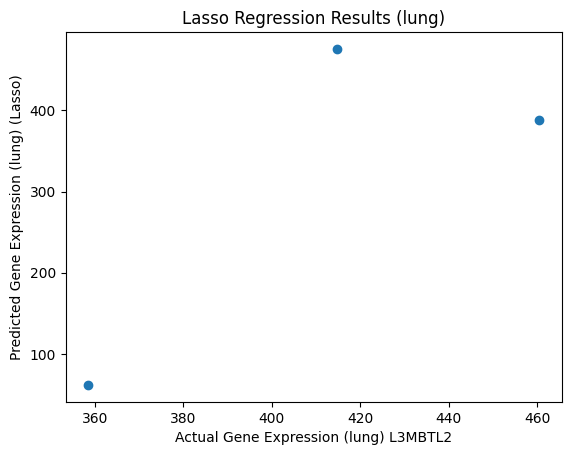

Lasso MSE for KCNJ11: 417.4437532193606
Non-zero coefficients for KCNJ11:
         Feature  Coefficient
29  CNV_9p24.1      -1.065683
38  CNV_3q26.33     -0.412030
43        CNV_8p    -3.038419
45  CNV_11q13.3     -4.715750
55  CNV_2q31.2      -0.599982
71  CNV_20q11.21     2.794380


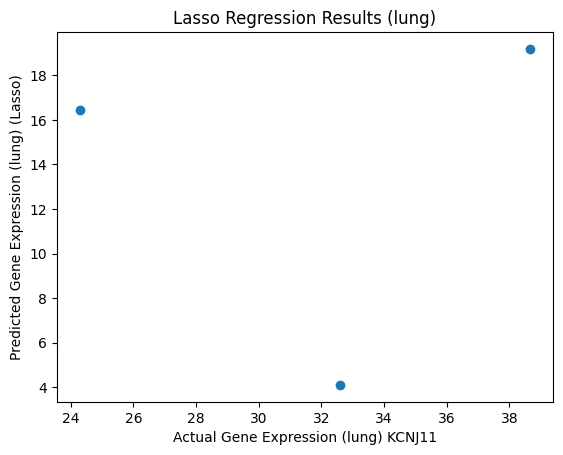

Lasso MSE for PRRC2B: 1271420.4542145773
Non-zero coefficients for PRRC2B:
         Feature  Coefficient
3   CNV_4q22.1    -326.611854
7         CNV_5q  -220.453822
32        CNV_3p  -124.466602
38  CNV_3q26.33    389.927635
44        CNV_8q    -4.881269
68  CNV_9p21.3     467.137886
87  CNV_8p11.23   -259.700250
95  CNV_3p12.1    -206.106510


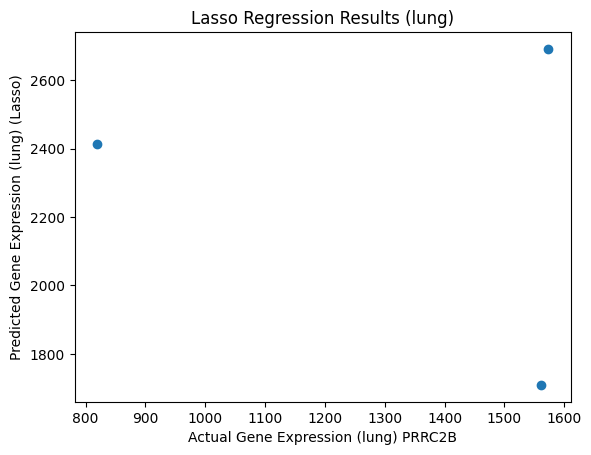

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+02, tolerance: 5.952e+01
  model = cd_fast.enet_coordinate_descent(


Lasso MSE for ELP5: 203577.4530801459
Non-zero coefficients for ELP5:
         Feature  Coefficient
30  CNV_8p23.2    -131.062152
31        CNV_3q   -89.050039
35  CNV_8q24.21      2.590084
44        CNV_8q    25.864491
45  CNV_11q13.3   -241.199210
55  CNV_2q31.2     141.693061
65  CNV_9p13.3     -23.646961
87  CNV_8p11.23      0.456094
88  CNV_18p11.32    70.682901
95  CNV_3p12.1     516.568595
96  CNV_3p11.1     280.444951


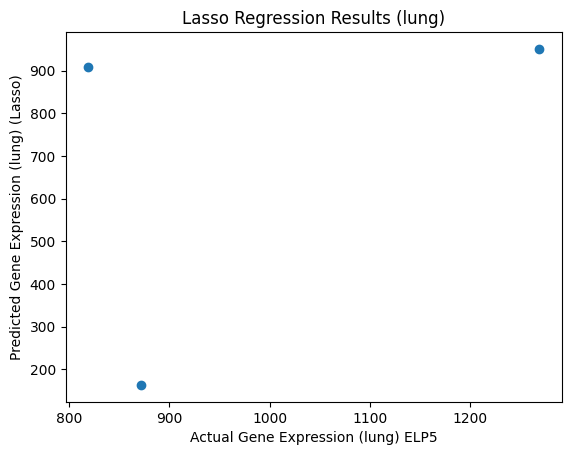

Lasso MSE for FOCAD: 34207.09722975583
Non-zero coefficients for FOCAD:
         Feature  Coefficient
7         CNV_5q    -3.567554
38  CNV_3q26.33     34.148539
45  CNV_11q13.3     -2.988536
55  CNV_2q31.2      14.356463
68  CNV_9p21.3     129.782442
76       CNV_20p   -94.671528
85  CNV_7q36.1       1.788310
87  CNV_8p11.23    -35.183103
95  CNV_3p12.1     -53.695310


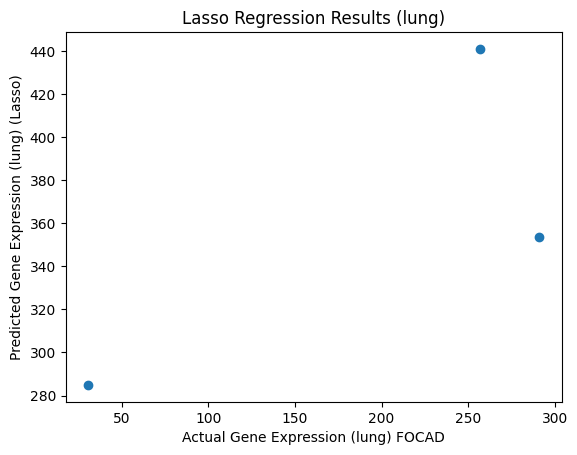

In [ ]:
# Loop over the genes
for gene_name in top_five_genes_lung_names:
    # Select the target gene for this iteration
    y_lasso_lung = cancerous_lung_df_common[gene_name]  # Gene expression data

    # Select the features (CNA data) for this gene
    X_lasso_lung = lung_cnv_copy

    # Split your data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_lasso_lung, y_lasso_lung, test_size=0.2, random_state=42)

    # Initialize Lasso regression model
    lasso_reg_lung = Lasso(alpha=1.0)  # You can adjust the alpha (penalty) parameter

    # Fit Lasso regression model
    lasso_reg_lung.fit(X_train, y_train)

    # Make predictions using the trained model
    lasso_predictions_lung = lasso_reg_lung.predict(X_test)

    # Calculate Mean Squared Error for Lasso predictions
    lasso_mse_lung = mean_squared_error(y_test, lasso_predictions_lung)

    # Print the Lasso MSE
    print(f"Lasso MSE for {gene_name}: {lasso_mse_lung}")

    # Create a DataFrame to store model summary
    summary_df_lung = pd.DataFrame()
    summary_df_lung['Feature'] = X_lasso_lung.columns
    summary_df_lung['Coefficient'] = lasso_reg_lung.coef_

    # Filter out non-zero coefficients
    nonzero_summary_df_lung = summary_df_lung[summary_df_lung['Coefficient'] != 0]
    # Print the non-zero coefficients for each gene
    print(f"Non-zero coefficients for {gene_name}:\n{nonzero_summary_df_lung}")
    plt.scatter(y_test, lasso_predictions_lung)
    plt.xlabel(f"Actual Gene Expression (lung) {gene_name}")
    plt.ylabel("Predicted Gene Expression (lung) (Lasso)")
    plt.title("Lasso Regression Results (lung)")
    plt.show()
    '''
    # Write the summary and Lasso MSE to a text file for each gene
    with open(f'Lasso_regression_results_Lung_gene{gene_name}.txt', 'w') as f:
        f.write(f"Lasso MSE for {gene_name}: {lasso_mse_lung}\n\n")
        f.write(nonzero_summary_df_lung.to_string(index=False))
        '''


## <font color='#097770'>***VII. Exporting The Results***</font>

In [ ]:
# # Define the path for the CSV file
# csv_path = 'corrected-wilcoxon-significant-lung.csv'

# # Write wilcoxon_significant_lung to the CSV file
# with open(csv_path, 'w', newline='') as csvfile:
#     fieldnames = ['Gene', 'Test Statistic', 'p-value', 'Adjusted p-value']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()

#     for gene, test_statistic, p_value, adj_p_value in wilcoxon_significant_lung:
#         writer.writerow({'Gene': gene, 'Test Statistic': test_statistic, 'p-value': p_value, 'Adjusted p-value': adj_p_value})

# # Define the path for the TXT file
# txt_path = 'wilcoxon-significant-lung.txt'

# # Write wilcoxon_significant_lung to the TXT file
# with open(txt_path, 'w') as txtfile:
#     for gene, test_statistic, p_value, adj_p_value in wilcoxon_significant_lung:
#         txtfile.write(f"Gene: {gene}, Test Statistic: {test_statistic}, p-value: {p_value}, Adjusted p-value: {adj_p_value}\n")

# print("Exported wilcoxon_significant_lung as CSV and TXT files.")

# <font color='#edca82'>***Kidney Analysis***</font>

## <font color='#097770  '>***I. Extracting Datasets***</font>

### <font color='#f5beb4  '>***A. Normal Kidney Dataset***</font>

In [ ]:
# Define file paths for the normal datasets
path_to_normal_txt = 'kirc-rsem-fpkm-tcga_paired.txt'

# Load the data from the TXT files into DataFrames
# We assume that the data is tab-separated (sep='\t')
normal_kidney_df = pd.read_csv(path_to_normal_txt, sep='\t')

# Print the shape (dimensions) of the Normal Kidney Dataset
print(f'Shape of Normal Kidney Dataset: {normal_kidney_df.shape}\n')

# Separator line for clarity
print('----------------------------------------------\n')

normal_kidney_df

# Now, the 'normal_kidney_df' DataFrame contains the data from the specified file

Shape of Normal Kidney Dataset: (19216, 70)

----------------------------------------------



,Hugo_Symbol,Entrez_Gene_Id,TCGA-CJ-5680,TCGA-CZ-5453,TCGA-CW-5591,TCGA-A3-3387,TCGA-CZ-5982,TCGA-CJ-5679,TCGA-CZ-5984,TCGA-CJ-5681,...,TCGA-CZ-5458,TCGA-CJ-6030,TCGA-CZ-5456,TCGA-B0-5402,TCGA-B0-5703,TCGA-CZ-5987,TCGA-CZ-5466,TCGA-CJ-6033,TCGA-CZ-5461,TCGA-B2-5636
0,METTL21B,25895,237.86,155.50,309.83,629.35,426.57,309.83,267.73,371.22,...,98.73,429.54,115.16,177.53,199.85,221.86,262.20,109.66,134.30,368.65
1,VSTM2B,342865,0.00,0.00,0.38,0.00,0.91,0.38,2.48,2.53,...,0.35,0.00,0.00,2.03,1.06,0.74,0.00,0.00,0.00,2.01
2,TXNDC16,57544,92.05,199.85,171.45,82.29,108.14,128.79,119.26,120.94,...,217.27,115.16,124.37,92.70,138.10,109.66,118.43,98.04,166.73,124.37
3,ZBTB49,166793,87.65,69.03,25.35,35.76,40.07,68.55,84.63,68.07,...,50.98,43.32,35.00,46.50,72.52,59.13,42.71,39.50,55.89,59.55
4,SYT1,6857,27.05,138.10,0.73,12.83,27.25,17.25,23.76,33.78,...,60.39,10.79,57.08,27.05,25.35,68.55,13.12,16.03,23.25,25.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19211,TTC37,9652,764.36,743.43,1023.00,521.76,703.28,679.29,728.11,674.59,...,638.15,559.28,518.15,599.49,624.99,728.11,603.67,480.04,656.11,769.69
19212,UXT,8409,2956.17,2997.45,4328.55,4543.80,2935.74,3168.41,2855.44,3419.52,...,3212.66,3419.52,3515.68,3395.89,4181.07,2997.45,3589.58,3372.43,3257.52,3018.30
19213,ALKBH3,221120,476.71,507.46,356.05,426.57,389.72,540.19,400.71,466.88,...,591.22,476.71,493.56,423.61,656.11,463.65,493.56,417.77,480.04,395.18
19214,BEGAIN,57596,31.22,12.55,4.10,7.82,7.69,12.83,13.52,49.91,...,3.14,11.04,2.23,27.25,2.14,8.06,9.06,17.13,10.31,25.91


### <font color='#f5beb4  '>***B. Cancerous Kidney Dataset***</font>

In [ ]:
# Define file paths for the cancerous datasets
path_to_cancerous_txt = 'kirc-rsem-fpkm-tcga-t_paired.txt'

# Load the data from the TXT files into DataFrames
# We assume that the data is tab-separated (sep='\t')
cancerous_kidney_df = pd.read_csv(path_to_cancerous_txt, sep='\t')

# Print the shape (dimensions) of the Cancerous Kidney Dataset
print(f'Shape of Cancerous Kidney Dataset: {cancerous_kidney_df.shape}\n')

# Separator line for clarity
print('----------------------------------------------\n')

cancerous_kidney_df

# Now, the 'cancerous_kidney_df' DataFrame contains the data from the specified file

Shape of Cancerous Kidney Dataset: (19216, 70)

----------------------------------------------



,Hugo_Symbol,Entrez_Gene_Id,TCGA-CJ-5680,TCGA-CZ-5453,TCGA-CW-5591,TCGA-A3-3387,TCGA-CZ-5982,TCGA-CJ-5679,TCGA-CZ-5984,TCGA-CJ-5681,...,TCGA-CZ-5458,TCGA-CJ-6030,TCGA-CZ-5456,TCGA-B0-5402,TCGA-B0-5703,TCGA-CZ-5987,TCGA-CZ-5466,TCGA-CJ-6033,TCGA-CZ-5461,TCGA-B2-5636
0,METTL21B,25895,234.57,299.25,171.45,285.03,265.87,463.65,348.71,195.72,...,231.32,244.57,551.56,493.56,361.04,400.71,444.72,141.02,320.80,358.54
1,VSTM2B,342865,0.00,0.00,0.00,0.73,0.00,0.00,0.39,334.46,...,0.00,0.00,0.38,0.39,0.00,0.00,0.40,3.00,0.00,0.00
2,TXNDC16,57544,57.89,182.55,122.64,100.13,189.02,69.52,133.36,129.69,...,181.28,153.34,103.69,212.78,157.68,48.18,97.36,78.34,255.00,199.85
3,ZBTB49,166793,39.50,77.79,35.25,59.55,94.67,23.42,59.13,56.68,...,53.19,45.21,46.84,70.51,64.34,51.35,60.82,41.22,61.68,65.72
4,SYT1,6857,3.00,0.36,7.63,3.14,0.33,1.62,1.11,29.06,...,2.51,8.19,2.51,1.83,0.39,0.00,3.06,0.36,1.06,17.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19211,TTC37,9652,633.73,629.35,679.29,743.43,791.35,551.56,872.10,733.19,...,813.63,607.87,490.14,1119.56,532.74,525.39,674.59,435.55,713.11,633.73
19212,UXT,8409,2956.17,3212.66,2701.35,3639.70,2451.44,6426.31,4802.93,2935.74,...,5831.91,4123.49,3820.70,3212.66,4388.98,3491.39,4481.23,5751.61,4010.71,2627.46
19213,ALKBH3,221120,353.59,547.75,376.41,536.45,426.57,409.15,466.88,353.59,...,693.58,674.59,490.14,540.19,536.45,429.54,514.56,551.56,269.60,518.15
19214,BEGAIN,57596,7.51,10.71,14.24,5.73,8.06,2.10,2.68,0.35,...,10.63,2.97,3.69,7.46,2.41,0.41,13.32,3.38,3.29,77.79


### <font color='#f5beb4'>***C. Copy Number Alterations[CNA] Of Kidney Dataset***</font>

In [ ]:
kidney_copy_number_path = 'kirc_CNV_core.txt'
kidney_cnv = pd.read_csv(kidney_copy_number_path, delimiter='\t', skiprows=0)
kidney_cnv = kidney_cnv.iloc[:, :-1]
kidney_cnv

,feature,CNV_20q,CNV_20p,CNV_Xq11.2,CNV_14q,CNV_17q24.3,CNV_7q36.3,CNV_12p,CNV_12q,CNV_7q,...,CNV_4p,CNV_4q,CNV_4q32.1,CNV_10q23.31,CNV_9p23,CNV_3p12.2,CNV_3q11.2,CNV_Xp11.4,CNV_9p,CNV_18p
0,TCGA-CJ-6033,0.000,0.000,-0.052984,-0.382,0.018996,0.003521,0.000,0.000,0.000,...,0.000,0.000,-0.037167,-0.214240,-0.371390,-0.550520,0.188420,-0.052984,-0.371,0.0
1,TCGA-CJ-6032,0.000,0.000,-0.029994,0.000,-0.010951,-0.000970,0.000,0.000,0.000,...,0.000,0.000,0.011958,-0.503490,0.014888,-0.504010,0.011261,-0.029994,0.000,0.0
2,TCGA-CJ-6031,0.000,0.000,-0.010232,0.000,0.002358,-0.000416,0.000,0.000,0.000,...,0.000,0.000,-0.001109,0.003330,-0.277150,0.000416,0.000416,-0.010232,-0.277,0.0
3,TCGA-CJ-6030,0.000,0.000,-0.098945,-0.500,0.008892,0.066372,0.000,0.000,0.000,...,-0.518,0.000,0.007059,0.000000,-0.492250,-0.516200,0.010146,-0.098945,-0.493,0.0
4,TCGA-B8-4622,0.455,0.455,0.007262,0.000,0.002080,0.447990,0.438,0.438,0.448,...,0.000,0.000,0.000000,-0.006505,-0.519590,0.001085,0.001085,0.012516,-0.505,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,TCGA-B0-5116,0.360,0.360,-0.061823,0.000,-0.016841,0.369040,0.356,0.356,0.369,...,-0.368,-0.368,-0.355560,-0.011887,-0.368500,-0.420140,-0.420140,-0.061823,-0.368,0.0
239,TCGA-B0-4688,0.000,0.498,0.083920,0.586,-0.065313,0.447480,1.371,0.334,0.422,...,0.242,-0.102,3.656900,-0.606320,0.924110,0.000000,0.000000,-0.756760,-0.127,0.0
240,TCGA-BP-4760,0.000,0.000,0.002717,0.000,0.004024,0.000000,0.000,0.000,0.000,...,0.000,0.000,0.002358,-0.010094,-0.003324,-0.005123,-0.005123,0.002717,0.000,0.0
241,TCGA-DV-5569,0.000,0.000,0.002775,0.000,0.004997,-0.006643,0.000,0.000,0.000,...,0.000,0.000,-0.005399,-0.002217,0.000693,-0.623790,0.002358,0.002775,0.000,0.0


## <font color='#097770'>***II. Calculating Difference Between Normal and Cancerous Gene Expression Levels***</font>

### <font color='#f5beb4'>***A. Concatenating Normal and Cancerous Gene Expression Levels***</font>

In [ ]:
# Get the list of all genes
allGenes_kidney = normal_kidney_df['Hugo_Symbol'].unique()

# Initialize a dictionary to store expression levels with gene names as keys
exprKidney_data = {}

# Iterate through all genes
for gene in allGenes_kidney:
    # Get the expression levels for the current gene
    normalKidney_expression = normal_kidney_df[normal_kidney_df['Hugo_Symbol'] == gene].iloc[:, 2:].values.flatten()
    cancerousKidney_expression = cancerous_kidney_df[cancerous_kidney_df['Hugo_Symbol'] == gene].iloc[:, 2:].values.flatten()

    # Store the expression levels in the dictionary with the gene name as the key
    exprKidney_data[gene] = {
        'Normal': normalKidney_expression,
        'Cancerous': cancerousKidney_expression
    }

# Now exprKidney_data is a dictionary where each key is a gene name, and the value is a dictionary
# containing 'Normal' and 'Cancerous' expression levels as NumPy arrays
# You can access the data for a specific gene using its name as the key

print('Printing a sample of our normal and cancerous expression levels concatenated with their corresponding gene:\n')

# Iterate through the first five genes and their expression data
# Initialize a table to display the gene expression data
table = PrettyTable()

# Define the column names for the table
table.field_names = ['Gene', 'Normal Expression', 'Cancerous Expression']

# Iterate through the first five genes and their expression data
for i, (gene, expression_data) in enumerate(exprKidney_data.items()):
    if i >= 5:  # Stop after the first five genes
        break
    # Add the data for the current gene to the table
    table.add_row([gene, expression_data['Normal'], expression_data['Cancerous']])

# Print the table
print(table)

numValues_per_gene_kidney = len(next(iter(exprKidney_data.values()))['Normal'])

# Print the shape of exprKidney_data
print(f'Shape of exprKidney_data: {len(exprKidney_data)} genes x {numValues_per_gene_kidney} values per gene')

Printing a sample of our normal and cancerous expression levels concatenated with their corresponding gene:

+----------+------------------------------------------------------------------------+--------------------------------------------------------------------------+
|   Gene   |                           Normal Expression                            |                           Cancerous Expression                           |
+----------+------------------------------------------------------------------------+--------------------------------------------------------------------------+
| METTL21B | [237.86 155.5  309.83 629.35 426.57 309.83 267.73 371.22 175.07 267.73 |  [234.57 299.25 171.45 285.03 265.87 463.65 348.71 195.72 115.16 348.71  |
|          |  155.5  173.85 211.31 283.05 107.38 157.68 182.55 140.04 256.78 187.71 |    149.12 100.13 293.07 228.13 281.09 480.04 150.17 110.43 211.31 255.   |
|          |  104.42 285.03 314.17 346.29 275.28 136.19 325.29 156.59 124.37 166.73 | 

### <font color='#f5beb4'>***B. Handling Null Values***</font>

In [ ]:
# Initialize a list to store the indices of genes with more than 50% zeros
genes_with_more_than_50_percent_zeros_kidney = []

# Iterate through all genes
for i, gene in enumerate(exprKidney_data):
    # Get the normal expression levels for the current gene
    normal_expression = exprKidney_data[gene]['Normal']
    cancerous_expression = exprKidney_data[gene]['Cancerous']

    # Count the number of zeros for normal and cancerous expressions
    num_zeros_normal = len(normal_expression[normal_expression == 0])
    num_zeros_cancerous = len(cancerous_expression[cancerous_expression == 0])

    # Calculate the percentage of zeros for normal and cancerous expressions
    percentage_zerosNormal = (num_zeros_normal / len(normal_expression)) * 100
    percentage_zerosCancerous = (num_zeros_cancerous / len(cancerous_expression)) * 100

    # Check if the percentage of zeros is more than 50% for both normal and cancerous expressions
    if percentage_zerosNormal >= 50 or percentage_zerosCancerous >= 50:
        genes_with_more_than_50_percent_zeros_kidney.append(i)

In [ ]:
# Filter out genes with more than 50% zeros from exprKidney_data
allGenes_kidney_filtered = [gene for i, gene in enumerate(exprKidney_data) if i not in genes_with_more_than_50_percent_zeros_kidney]

# Get the list of genes that were filtered out
filteredGenes_Kidney = [gene for i, gene in enumerate(exprKidney_data) if i in genes_with_more_than_50_percent_zeros_kidney]

# Create new dictionaries to store the filtered and removed data
exprKidney_data_filteredGenes = {gene: exprKidney_data[gene] for gene in allGenes_kidney_filtered}
exprKidney_data_removedGenes = {gene: exprKidney_data[gene] for gene in filteredGenes_Kidney}

# Print the number of filtered and removed genes
print(f"Number of filtered genes: {len(exprKidney_data_filteredGenes)}")
print(f"Number of removed genes: {len(exprKidney_data_removedGenes)}","\n")

# Separator line for clarity
print('----------------------------------------------\n')

# Printing out a sample of removed genes
print('A sample of first 10 genes removed for having null values greater than or equal 50%:\n')

# Get the list of genes in exprKidney_data_removedGenes
genes_in_removedGenes = list(exprKidney_data_removedGenes.keys())

# Iterate over the first ten genes in exprKidney_data_removedGenes
# Create a list of lists to hold the data
data = []

# Populate the data list with the first ten genes and their indices
for i, gene in enumerate(genes_in_removedGenes[:10]):
    if i >= 10:
        break
    index_in_exprKidney_data = list(exprKidney_data.keys()).index(gene)
    data.append([gene, index_in_exprKidney_data+1])

# Print the table using tabulate
print(tabulate(data, headers=["Gene Name", "Index in exprKidney_data"], tablefmt="pretty"))


Number of filtered genes: 17034
Number of removed genes: 2182 

----------------------------------------------

A sample of first 10 genes removed for having null values greater than or equal 50%:

+---------------+--------------------------+
|   Gene Name   | Index in exprKidney_data |
+---------------+--------------------------+
|    VSTM2B     |            2             |
|    MRGPRX2    |            10            |
|     INSL5     |            19            |
| RP11-15E18.4  |            23            |
|    C3orf22    |            30            |
|    CXorf28    |            32            |
| RP11-865B13.1 |            33            |
|    AADACL2    |            34            |
|   KIAA1658    |            37            |
|    ALPPL2     |            50            |
+---------------+--------------------------+


### <font color='#f5beb4'>***C. Calculating Differences Between Normal and Cancerous Gene Expression Levels***</font>

In [ ]:
# Initialize a list to store the differences
exprKidney_differences = []

# Iterate through the genes
for gene, expression_data in exprKidney_data_filteredGenes.items():
    # Get the normal and cancerous expression levels
    normal_levels = expression_data['Normal']
    cancerous_levels = expression_data['Cancerous']

    # Calculate the differences for each gene
    differences = cancerous_levels - normal_levels

    # Add the differences to the list
    exprKidney_differences.append((gene, differences))

# Now exprKidney_differences contains the gene name and the corresponding differences for each gene

print('Printing a sample of difference between normal and cancerous expression levels concatenated with their corresponding gene:\n')

# Print the first five lists
# Define the table
table = PrettyTable()
table.field_names = ["Gene", "Differences"]

# Populate the table with the first five genes and their differences
for gene, differences in exprKidney_differences[:5]:
    table.add_row([gene, differences])

# Print the table
print(table)

# Check the shape of exprKidney_differences
valPerGene_kidney = len(exprKidney_differences[0][1])

print(f'Shape of exprKidney_differences: {len(exprKidney_differences)} genes x {valPerGene_kidney} values per gene')

Printing a sample of difference between normal and cancerous expression levels concatenated with their corresponding gene:

+----------+--------------------------------------------------------------------------+
|   Gene   |                               Differences                                |
+----------+--------------------------------------------------------------------------+
| METTL21B | [  -3.29  143.75 -138.38 -344.32 -160.7   153.82   80.98 -175.5   -59.91 |
|          |    80.98   -6.38  -73.72   81.76  -54.92  173.71  322.36  -32.38  -29.61 |
|          |   -45.47   67.29   18.22   10.08   64.87  -71.01   50.01   41.34  -46.15 |
|          |    87.98   48.28  163.11 -215.87   49.85  155.85  259.19   34.73  129.97 |
|          |    61.53  -19.87  219.99  128.02   95.27  184.83  -77.71  123.59 -162.26 |
|          |    25.46 -137.74  309.2    68.51  -22.44   18.17  -45.16  312.28  199.17 |
|          |    95.98   69.66  343.85   62.93  132.59 -184.97  436.4   316.03  161.1

## <font color='#097770'>***III. Normality Test [Wilk Shapiro Test]***</font>

In [ ]:
# Initialize lists to store genes based on normality test results
normalKidney_diff = []  # List to store genes with normal distribution
non_normalKidney_diff = []  # List to store genes without normal distribution

# Function for Shapiro-Wilk normality test
def normality_test(data, alpha=0.05):
    """
    Performs the Shapiro-Wilk normality test on a dataset.

    Args:
        data (array-like): The dataset to be tested for normality.
        alpha (float, optional): The significance level for the test. Defaults to 0.05.

    Returns:
        None: Appends the gene and its data to normal_diff or non_normal_diff based on the test result.
    """
    #calculating the test statistics and the p value with the Shapiro-Wilk function from library
    shapiro_statistics, shapiro_p = stats.shapiro(data)

    # Seeing the significance level with the p value output from the function
    if shapiro_p > alpha:
        normalKidney_diff.append((gene, data))
    elif shapiro_p < alpha:
        non_normalKidney_diff.append((gene, data))

# Applying the normality test to each gene's differences
for gene, differences in exprKidney_differences:
    normality_test(differences)

# Now the genes are divided into normal and non-normal based on the Shapiro-Wilk test results

# Count how many genes passed and did not pass the normality test and printing them
print(f"Number of genes that passed the normality test: {len(normalKidney_diff)}")
print(f"Number of genes that did not pass the normality test: {len(non_normalKidney_diff)}")

Number of genes that passed the normality test: 6504
Number of genes that did not pass the normality test: 10530


## <font color='#097770'>***IV. Hypothesis Testing [Wilcoxon: Signed-Rank test]***</font>
---
* Null Hypothesis (Ho): There is no difference in gene expression between normal and cancerous conditions.
* Alternative Hypothesis (Ha): There is a difference in gene expression between normal and cancerous conditions.

In [ ]:
# Initialize lists to store the test results
wilcoxon_significant_kidney = []
wilcoxon_not_significant_kidney = []
alpha = 0.05

def wilcoxon_signed_rank_test(data, alpha=0.05):

    """
    a function to do the signed rank wilcoxon test on the dataset.
    as after the normality test, the data was partially normal and partially non normal

    Arguments:
        data : array like structure that takes in the data that will be tested
        alpha : it's The significance level for the test. Defaults to 0.05.
    Returns:
     doesn't return a value, it just appends in the lists


    """

    # Perform the Wilcoxon signed rank test
    test_statistic, p_value = stats.wilcoxon(data)

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        wilcoxon_significant_kidney.append((gene, test_statistic, p_value))
    elif p_value > alpha:
        wilcoxon_not_significant_kidney.append((gene, test_statistic, p_value))

# Applying the Wilcoxon signed rank test to each gene's differences that passed the normality test
for gene, differences in exprKidney_differences:
    wilcoxon_signed_rank_test(differences)

# wilcoxon_results shall contains the gene name, test statistic, and p-value for each gene

# Check the number of significant genes after the Wilcoxon signed rank test
significant_genes_kidney = sum(1 for _, _, p_value in wilcoxon_significant_kidney if p_value < alpha)
non_significant_genes_kidney = sum(1 for _, _, p_value in wilcoxon_not_significant_kidney if p_value > alpha)
print(f"Number of significant genes (kidney): {significant_genes_kidney}")
print(f"Number of non significant genes (kidney): {non_significant_genes_kidney}")


Number of significant genes (kidney): 13240
Number of non significant genes (kidney): 3794


## <font color='#097770'>***V. Hypothesis Testing Correction & Identifying DEGs [Kidney]***</font>

### <font color='#f5beb4'>***Correction [False Discovery Rate (The Benjamini-Hochberg procedure)] & Calculating DEGs***</font>

In [ ]:
# Extract the p-values from wilcoxon_significant_kidney
p_values = [p_value for _, _, p_value in wilcoxon_significant_kidney]

# Perform FDR correction
reject, corrected_p_values, _, _ = multitest.multipletests(p_values, alpha=0.05, method='fdr_bh')

# Update the wilcoxon_significant_kidney list with corrected p-values
for i, gene_data in enumerate(wilcoxon_significant_kidney):
    if len(gene_data) >= 3:  # Check if the tuple has at least 3 elements
        gene, test_statistic, p_value = gene_data
        corrected_p_value = corrected_p_values[i]
        wilcoxon_significant_kidney[i] = (gene, test_statistic, p_value, corrected_p_value)

# Check the number of corrected genes after FDR correction
corrected_genes_kidney_fdr = sum(1 for _, _, _, p_value in wilcoxon_significant_kidney if p_value < alpha)

# Print the number of FDR corrected significant genes
print(f"Number of DEGs (FDR) of Kidney Dataset: {corrected_genes_kidney_fdr}")

Number of DEGs (FDR) of Kidney Dataset: 13240


## <font color='#097770'>***VI. Handling Null Values In Copy Number Alterations [CNV] Dataset & Picking Selecting Targets***</font>

### <font color='#f5beb4  '>***A. Picking 5 Genes Having The Highest Change In Gene Activity [Due to the presence of cancer]***</font>

In [ ]:
# Get the subjects' names (assuming they start from the second column)
subjects_kidney = normal_kidney_df.columns[2:]
print(len(subjects_kidney))
# print(subjects)

# Sort wilcoxon_significant_kidney based on test statistic in descending order
wilcoxon_significant_kidney_sorted = sorted(wilcoxon_significant_kidney, key=lambda x: x[1], reverse=True)

# Select the top five genes with the highest test statistic
top_five_genes_kidney = wilcoxon_significant_kidney_sorted[:5]

# Create a PrettyTable instance
table = PrettyTable()

# Define the column names
table.field_names = ["Gene", "Subject", "Test Statistic", "p-value", "Adjusted p-value"]

# Populate the table with data
for gene, test_statistic, p_value, corrected_p_value in top_five_genes_kidney:
    for i, subject_name in enumerate(subjects_kidney):
        if i == 0:  # Print the gene info only once
            table.add_row([gene, subject_name, test_statistic, p_value, corrected_p_value])
        else:  # Print empty gene info for subsequent subjects
            table.add_row(["", subject_name, "", "", ""])
    # Add an empty row (separator) between genes
    table.add_row(["", "", "", "", ""])

# Print the table
print(table)

68
+--------+--------------+----------------+----------------------+----------------------+
|  Gene  |   Subject    | Test Statistic |       p-value        |   Adjusted p-value   |
+--------+--------------+----------------+----------------------+----------------------+
| SCRG1  | TCGA-CJ-5680 |     852.0      | 0.049828577261607186 | 0.049828577261607186 |
|        | TCGA-CZ-5453 |                |                      |                      |
|        | TCGA-CW-5591 |                |                      |                      |
|        | TCGA-A3-3387 |                |                      |                      |
|        | TCGA-CZ-5982 |                |                      |                      |
|        | TCGA-CJ-5679 |                |                      |                      |
|        | TCGA-CZ-5984 |                |                      |                      |
|        | TCGA-CJ-5681 |                |                      |                      |
|        | TCGA-CJ

### <font color='#f5beb4  '>***B. Handling Null Values & Filtering Uncommon Subjects***</font>

In [ ]:
# Initialize a list to store the names of removed columns
removed_columns_kidney = []

# Iterate over each column in the DataFrame (excluding the first column)
for column in kidney_cnv.columns[1:]:
    # Count the number of zeros in the column
    zero_count = (kidney_cnv[column] == 0).sum()

    # Calculate the percentage of zeros in the column
    zero_percentage = (zero_count / len(kidney_cnv)) * 100

    # Check if the percentage of zeros is greater than or equal to 50%
    if zero_percentage >= 50:
        # If so, add the column name to the list of removed columns
        removed_columns_kidney.append(column)

# Remove the identified columns from the kidney_cnv DataFrame
kidney_cnv.drop(columns=removed_columns_kidney, inplace=True)

# Print the number of columns removed and the updated length of the DataFrame
print(f"Updated number of kidney_cnv Dataset's features after null values handling: {kidney_cnv.shape[1]} features")

# 'kidney_cnv' will now have columns where more than 50% of the values are non-zero remaining
# 'removed_columns_kidney' will be a list of removed column names

Updated number of kidney_cnv Dataset's features after null values handling: 31 features


In [ ]:
# Assuming 'kidney_cnv' is your DataFrame
common_subjects_kidney = set(subjects_kidney) & set(kidney_cnv.iloc[:, 0])

# Filter kidney_cnv to keep only common subjects
kidney_cnv = kidney_cnv[kidney_cnv.iloc[:, 0].isin(common_subjects_kidney)]

# Print the updated length of kidney_cnv
print(f"Updated number of kidney_cnv Dataset's subjects after filtering common subjects: {kidney_cnv.shape[0]} subjects")
print(f"Updated shape of kidney_cnv Dataset's subjects after filtering common subjects: {kidney_cnv.shape}")

Updated number of kidney_cnv Dataset's subjects after filtering common subjects: 59 subjects
Updated shape of kidney_cnv Dataset's subjects after filtering common subjects: (59, 31)


In [ ]:
kidney_cnv_copy = kidney_cnv.copy()

### <font color='#f5beb4  '>***C. Preparing the Features and Responses***</font>

In [ ]:
# Define a list of the top five gene names for kidney cancer
top_five_genes_kidney_names = [top_five_genes_kidney[i][0] for i in range(5)]

# Remove a specific column (column at index 1) from the DataFrame 'cancerous_kidney_df'
cancerous_kidney_df = cancerous_kidney_df.drop(cancerous_kidney_df.columns[1], axis=1)

# Set the 'Hugo_Symbol' column as the index of the DataFrame
cancerous_kidney_df.set_index('Hugo_Symbol', inplace=True)

# Rename the index (formerly 'Hugo_Symbol') to 'Subject'
cancerous_kidney_df = cancerous_kidney_df.rename_axis('Subject')

# Select rows in 'cancerous_kidney_df' where the index (gene names) match the top five gene names
cancerous_kidney_df_common = cancerous_kidney_df[cancerous_kidney_df.index.isin(top_five_genes_kidney_names)]

# Transpose the DataFrame to have the genes as columns and subjects as rows
cancerous_kidney_df_common = cancerous_kidney_df_common.T

# Display the resulting DataFrame
cancerous_kidney_df_common


Subject,CALR3,RDX,SCRG1,CDS2,GPR153
TCGA-CJ-5680,0.33,1242.34,1.69,808.00,155.50
TCGA-CZ-5453,2.89,1233.75,0.74,624.99,58.30
TCGA-CW-5591,0.69,1417.35,3.17,934.76,66.18
TCGA-A3-3387,2.10,1781.89,28.65,723.08,155.50
TCGA-CZ-5982,1.31,3212.66,0.67,796.86,76.71
...,...,...,...,...,...
TCGA-CZ-5987,0.75,909.17,1.16,497.00,31.67
TCGA-CZ-5466,1.93,813.63,3.50,819.30,134.30
TCGA-CJ-6033,1.45,813.63,8.38,616.37,56.28
TCGA-CZ-5461,1.06,1794.29,1.81,896.64,55.89


In [ ]:
# Set the first column as the index of the DataFrame 'kidney_cnv_copy'
kidney_cnv_copy = kidney_cnv_copy.set_index(kidney_cnv_copy.columns[0])

# Rename the index (formerly the first column) to 'Subject'
kidney_cnv_copy = kidney_cnv_copy.rename_axis('Subject')

# Display the resulting DataFrame, the head only as it's larger
kidney_cnv_copy.head()


,CNV_Xq11.2,CNV_17q24.3,CNV_7q36.3,CNV_3p21.32,CNV_14q31.1,CNV_3q26.32,CNV_8p23.2,CNV_3p,CNV_1q43,CNV_Xq23,...,CNV_5q35.1,CNV_1p36.23,CNV_1p31.1,CNV_10p14,CNV_4q32.1,CNV_10q23.31,CNV_9p23,CNV_3p12.2,CNV_3q11.2,CNV_Xp11.4
Subject,,,,,,,,,,,,,,,,,,,,,
TCGA-CJ-6033,-0.052984,0.018996,0.003521,-0.55052,-0.381860,0.234320,-0.658140,-0.551,0.085275,-0.045990,...,0.590690,-0.210280,0.067142,0.006392,-0.037167,-0.214240,-0.371390,-0.550520,0.188420,-0.052984
TCGA-CJ-6030,-0.098945,0.008892,0.066372,-0.51620,-0.499960,0.010146,-0.453290,-0.516,0.020012,-0.098945,...,0.053237,-0.513420,0.020012,-0.006643,0.007059,0.000000,-0.492250,-0.516200,0.010146,-0.098945
TCGA-B8-4622,0.007262,0.002080,0.447990,-0.55537,0.000139,0.001803,-0.005399,-0.547,0.003191,0.007262,...,-0.003413,0.022304,0.003191,-0.006505,0.000000,-0.006505,-0.519590,0.001085,0.001085,0.012516
TCGA-B0-4700,-0.009681,0.010842,0.095508,-0.08206,-0.000416,0.051672,-0.097968,0.000,0.102490,-0.009681,...,0.115940,-0.115250,0.019028,-0.063435,0.000000,-0.063435,-0.070536,-0.082060,-0.082060,-0.009681
TCGA-CW-5591,0.210040,0.000000,0.446980,-0.50256,-0.008310,0.460920,0.861950,-0.075,-0.008853,0.210040,...,1.345200,0.006665,-0.516510,-0.009681,-0.028345,-0.011453,-0.490570,-0.466100,0.460920,0.210040


In [ ]:
# Filter rows in 'cancerous_kidney_df_common' based on the index values from 'kidney_cnv_copy'
cancerous_kidney_df_common = cancerous_kidney_df_common[cancerous_kidney_df_common.index.isin(kidney_cnv_copy.index.tolist())]

# Display the resulting DataFrame
cancerous_kidney_df_common.head()


Subject,CALR3,RDX,SCRG1,CDS2,GPR153
TCGA-CJ-5680,0.33,1242.34,1.69,808.00,155.50
TCGA-CZ-5453,2.89,1233.75,0.74,624.99,58.30
TCGA-CW-5591,0.69,1417.35,3.17,934.76,66.18
TCGA-A3-3387,2.10,1781.89,28.65,723.08,155.50
TCGA-CZ-5982,1.31,3212.66,0.67,796.86,76.71
TCGA-CJ-5679,0.00,651.58,5.32,780.44,73.03
TCGA-CZ-5984,0.37,1208.34,1.89,728.11,62.56
TCGA-CJ-5681,0.93,1991.00,0.00,808.00,65.72
TCGA-CJ-5672,0.00,995.00,0.78,775.05,43.94
TCGA-B0-5691,0.00,1662.49,17.77,1044.52,58.71


In [ ]:
# Sort the index of 'cancerous_kidney_df_common' in ascending order
cancerous_kidney_df_common = cancerous_kidney_df_common.sort_index(ascending=True)

# Sort the index of 'kidney_cnv_copy' in ascending order
kidney_cnv_copy = kidney_cnv_copy.sort_index(ascending=True)

# Check if the indices of both DataFrames are equal
cancerous_kidney_df_common.index == kidney_cnv_copy.index


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
cancerous_kidney_df_common.head() #the response df of cancerous kidney

Subject,CALR3,RDX,SCRG1,CDS2,GPR153
TCGA-A3-3387,2.10,1781.89,28.65,723.08,155.50
TCGA-B0-4700,3.03,660.68,8.38,802.41,66.18
TCGA-B0-4712,1.46,921.88,46.84,981.29,55.49
TCGA-B0-5402,1.83,1628.26,7.00,1023.00,23.59
TCGA-B0-5690,1.77,1477.58,1.79,1088.92,36.79


In [ ]:
kidney_cnv_copy.head() #the features df of cancerous kidney

,CNV_Xq11.2,CNV_17q24.3,CNV_7q36.3,CNV_3p21.32,CNV_14q31.1,CNV_3q26.32,CNV_8p23.2,CNV_3p,CNV_1q43,CNV_Xq23,...,CNV_5q35.1,CNV_1p36.23,CNV_1p31.1,CNV_10p14,CNV_4q32.1,CNV_10q23.31,CNV_9p23,CNV_3p12.2,CNV_3q11.2,CNV_Xp11.4
Subject,,,,,,,,,,,,,,,,,,,,,
TCGA-A3-3387,0.026469,0.004580,0.158080,-0.51887,-0.508360,0.316430,-0.097482,-0.519,0.022585,0.026469,...,0.636460,0.022585,0.022585,-0.012989,-0.004016,-0.012989,-0.008715,-0.550460,0.316430,0.026469
TCGA-B0-4700,-0.009681,0.010842,0.095508,-0.08206,-0.000416,0.051672,-0.097968,0.000,0.102490,-0.009681,...,0.115940,-0.115250,0.019028,-0.063435,0.000000,-0.063435,-0.070536,-0.082060,-0.082060,-0.009681
TCGA-B0-4712,-0.035993,-0.244360,0.400280,-0.30216,-0.291890,0.407380,-0.316460,0.107,0.070817,-0.052613,...,0.461500,-0.090463,-0.915370,-0.295200,-0.293780,-0.295200,-0.280500,-0.302160,0.409780,-0.035993
TCGA-B0-5402,-0.112600,-0.002771,-0.000277,-0.59779,0.008753,0.009449,0.004441,-0.598,0.003330,-0.112600,...,0.576480,0.013213,-0.252770,0.006944,-0.052936,-0.592920,-0.282800,-0.597790,0.004398,-0.112600
TCGA-B0-5690,0.008474,-0.000693,-0.007301,-0.47860,0.001664,0.454610,0.013492,-0.471,0.000416,0.008474,...,-0.002355,0.000416,0.000416,-0.010646,-0.006505,-0.010646,0.003191,-0.007196,-0.007196,0.008474


## <font color='#097770'>***VI. Features Reduction and Models Construction***</font>

### <font color='#f5beb4  '>***A. Feature reduction using PCA method***</font>

In [ ]:
# Load the kidney dataset
X_kidney_PCA = kidney_cnv_copy
important_features_kidney_PCA_dict = {}

for gene_name in top_five_genes_kidney_names:  # Assuming you have a list of top genes for kidney
    # Select the target gene for this iteration
    y_kidney_PCA = cancerous_kidney_df_common[gene_name]

    # Standardize the features to have mean=0 and variance=1
    scaler = StandardScaler()
    X_scaled_kidney_PCA = scaler.fit_transform(X_kidney_PCA)

    # Perform PCA
    pca_kidney = PCA(n_components=kidney_cnv.shape[1] - 2)
    X_pca_kidney = pca_kidney.fit_transform(X_scaled_kidney_PCA)

    # Assume pca is a trained PCA model and X is your feature matrix
    components_kidney_PCA = pd.DataFrame(pca_kidney.components_, columns=X_kidney_PCA.columns)
    gene_important_features = []

    # For each principal component
    for i in range(components_kidney_PCA.shape[0]):
        # Get the absolute values of the coefficients for the i-th principal component
        component_kidney_PCA = np.abs(components_kidney_PCA.iloc[i])

        # Sort the features by the coefficients
        sorted_features_kidney_PCA = component_kidney_PCA.sort_values(ascending=False)

        # Append the most important feature for the i-th principal component to the list
        gene_important_features.append(sorted_features_kidney_PCA.idxmax())

    # Store the important features for this gene in the dictionary
    important_features_kidney_PCA_dict[gene_name] = gene_important_features

print("Important features for the top five genes in the kidney dataset:")
print(important_features_kidney_PCA_dict)


Important features for the top five genes in the kidney dataset:
{'SCRG1': ['CNV_Xq23    ', 'CNV_Xp22.2 ', 'CNV_1q32.1 ', 'CNV_10p14  ', 'CNV_3p25.3  ', 'CNV_9p21.3  ', 'CNV_3p12.2  ', 'CNV_3q11.2  ', 'CNV_8p23.2  ', 'CNV_1q24.1 ', 'CNV_7q36.3 ', 'CNV_Xq11.2 ', 'CNV_6q26    ', 'CNV_2q37.3  ', 'CNV_2q37.3  ', 'CNV_10p14  ', 'CNV_14q31.1 ', 'CNV_7q36.3 ', 'CNV_8q24.22', 'CNV_Xq23    ', 'CNV_1q24.1 ', 'CNV_1p31.1  ', 'CNV_1q43    ', 'CNV_4q34.3  ', 'CNV_1q32.1 ', 'CNV_3p12.2  ', 'CNV_9p23    ', 'CNV_3p21.32 ', 'CNV_9p21.3  '], 'CDS2': ['CNV_Xq23    ', 'CNV_Xp22.2 ', 'CNV_1q32.1 ', 'CNV_10p14  ', 'CNV_3p25.3  ', 'CNV_9p21.3  ', 'CNV_3p12.2  ', 'CNV_3q11.2  ', 'CNV_8p23.2  ', 'CNV_1q24.1 ', 'CNV_7q36.3 ', 'CNV_Xq11.2 ', 'CNV_6q26    ', 'CNV_2q37.3  ', 'CNV_2q37.3  ', 'CNV_10p14  ', 'CNV_14q31.1 ', 'CNV_7q36.3 ', 'CNV_8q24.22', 'CNV_Xq23    ', 'CNV_1q24.1 ', 'CNV_1p31.1  ', 'CNV_1q43    ', 'CNV_4q34.3  ', 'CNV_1q32.1 ', 'CNV_3p12.2  ', 'CNV_9p23    ', 'CNV_3p21.32 ', 'CNV_9p21.3  '], 'GPR153

### <font color='#f5beb4  '>***B. LR Model using Features reduced using PCA method***</font>

In [ ]:
# For each gene in top_five_genes_kidney_names
for gene in top_five_genes_kidney_names:
    # Select the most important features
    X_kidney_PCA = kidney_cnv_copy[important_features_kidney_PCA_dict[gene]]
    y_kidney_PCA = cancerous_kidney_df_common[gene]

    # Add a constant to the features
    X_train_sm_kidney_PCA = sm.add_constant(X_kidney_PCA)

    # Fit the model
    model_kidney_PCA = sm.OLS(y_kidney_PCA, X_train_sm_kidney_PCA)
    results_kidney_PCA = model_kidney_PCA.fit()
'''
    # Write the summary, p-values, and coefficients to a text file
    with open(f'Kidney_gene_{gene}_results.txt', 'w') as f:
        f.write(results_kidney_PCA.summary().as_text())
        f.write('\n\nThe p-values for kidney data PCA method are: \n')
        f.write(results_kidney_PCA.pvalues.to_string())
        f.write('\n\nThe regression coefficients for kidney data PCA method are: \n')
        f.write(results_kidney_PCA.params.to_string())
        f.write('\n\nThe final model coefficients for kidney data PCA method are: \n')
        f.write(results_kidney_PCA.params[results_kidney_PCA.pvalues <= 0.05].to_string())
        '''


### <font color='#f5beb4  '>***C. Ridge Regression Model [Kidney version] [no feature selection]***</font>

In [ ]:
# Loop over the genes
for gene_name in top_five_genes_kidney_names:
    # Select the target gene for this iteration
    y_ridge_kidney = cancerous_kidney_df_common[gene_name]  # Gene expression data

    # Select the features (CNA data) for this gene
    X_ridge_kidney = kidney_cnv_copy

    # Split your data into training and testing sets
    X_train_ridge_kidney, X_test_ridge_kidney, y_train_ridge_kidney, y_test_ridge_kidney = train_test_split(X_ridge_kidney, y_ridge_kidney, test_size=0.2, random_state=42)

    # Initialize Ridge regression model
    ridge_reg_kidney = Ridge(alpha=1.0)  # You can adjust the alpha (penalty) parameter

    # Fit Ridge regression model
    ridge_reg_kidney.fit(X_train_ridge_kidney, y_train_ridge_kidney)

    # Make predictions using the trained model
    ridge_predictions = ridge_reg_kidney.predict(X_test_ridge_kidney)

    # Calculate Mean Squared Error for Ridge predictions
    ridge_mse_kidney = mean_squared_error(y_test_ridge_kidney, ridge_predictions)

    # Calculate R-squared (R²) for Ridge regression
    ridge_r_squared = r2_score(y_test_ridge_kidney, ridge_predictions)

    # Print the Ridge MSE and R² for each gene
    print(f"Ridge MSE [KIDNEY] for {gene_name}: {ridge_mse_kidney}")
    print(f"Ridge Regression R² [KIDNEY] for {gene_name}: {ridge_r_squared}")


Ridge MSE [KIDNEY] for SCRG1: 71.90060334369048
Ridge Regression R² [KIDNEY] for SCRG1: -0.006548506848083946
Ridge MSE [KIDNEY] for CDS2: 17443.993778637512
Ridge Regression R² [KIDNEY] for CDS2: 0.15456208761244772
Ridge MSE [KIDNEY] for GPR153: 1877.100355011551
Ridge Regression R² [KIDNEY] for GPR153: -0.22016993961877152
Ridge MSE [KIDNEY] for CALR3: 0.9475555286121615
Ridge Regression R² [KIDNEY] for CALR3: -1.0484488326169972
Ridge MSE [KIDNEY] for RDX: 440223.1644678733
Ridge Regression R² [KIDNEY] for RDX: -0.3020535749247544


### <font color='#f5beb4  '>***D. Lasso Regression Model [Kidney version] [performs feature selection]***</font>

Lasso MSE for SCRG1: 73.08842736532365
Non-zero coefficients for SCRG1:
Empty DataFrame
Columns: [Feature, Coefficient]
Index: []


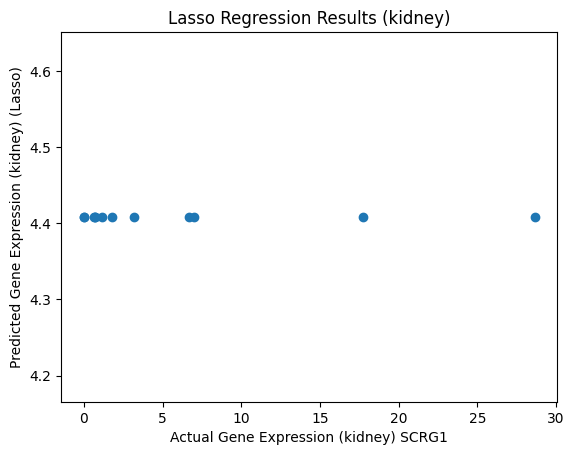

Lasso MSE for CDS2: 22747.441690329248
Non-zero coefficients for CDS2:
         Feature  Coefficient
2    CNV_7q36.3     -8.933400
4   CNV_14q31.1     20.530276
6   CNV_8p23.2     130.687849
10  CNV_4q34.3     116.895453
11   CNV_8q24.22  -290.715296
12   CNV_1q24.1     53.540078
13  CNV_2q37.3      86.721396
15  CNV_13q13.3     65.071656
16  CNV_6q26        24.800815
18   CNV_1q32.1   -224.725405
19  CNV_3p25.3    -128.082403
20   CNV_5q35.1     -1.624553
21  CNV_1p36.23     81.740886
22  CNV_1p31.1    -130.362514
24   CNV_4q32.1   -442.926269
25  CNV_10q23.31   -93.148866
26  CNV_9p23        75.444666
27  CNV_3p12.2      90.679528
29   CNV_Xp11.4    128.356340


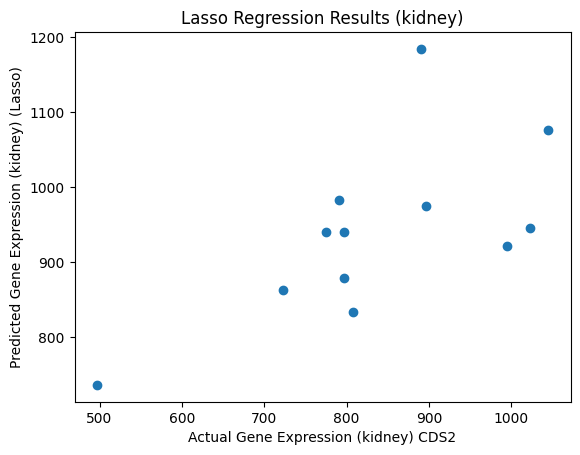

Lasso MSE for GPR153: 1639.9604768843567
Non-zero coefficients for GPR153:
         Feature  Coefficient
1    CNV_17q24.3    89.611965
2    CNV_7q36.3     42.200779
4   CNV_14q31.1    -46.587792
8   CNV_1q43       -64.538844
11   CNV_8q24.22    47.410822
14  CNV_9p21.3     -18.623372
19  CNV_3p25.3      22.211818
20   CNV_5q35.1    -34.742539
21  CNV_1p36.23      5.110838
27  CNV_3p12.2      -1.131285
28  CNV_3q11.2      -7.079956
29   CNV_Xp11.4     29.756323


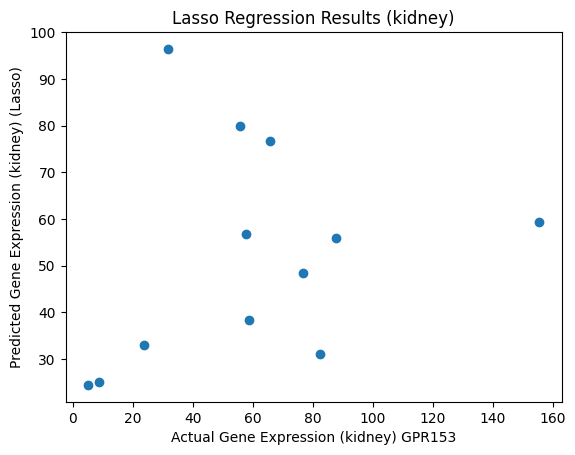

Lasso MSE for CALR3: 0.5532543609476385
Non-zero coefficients for CALR3:
Empty DataFrame
Columns: [Feature, Coefficient]
Index: []


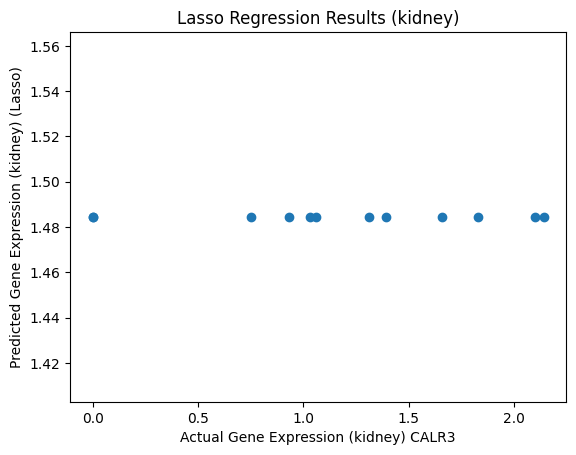

Lasso MSE for RDX: 449486.7887740051
Non-zero coefficients for RDX:
         Feature  Coefficient
1    CNV_17q24.3  -640.095302
2    CNV_7q36.3   -271.033788
4   CNV_14q31.1    -10.296562
5    CNV_3q26.32     6.364320
6   CNV_8p23.2     456.380391
7         CNV_3p  -580.936763
8   CNV_1q43       -75.897928
10  CNV_4q34.3     280.270759
11   CNV_8q24.22  -137.668504
12   CNV_1q24.1   -218.666194
13  CNV_2q37.3      50.206715
14  CNV_9p21.3     423.565088
15  CNV_13q13.3   -508.704796
16  CNV_6q26        39.715103
18   CNV_1q32.1   -440.632125
19  CNV_3p25.3    -712.542214
20   CNV_5q35.1   -384.113922
21  CNV_1p36.23   -169.408192
22  CNV_1p31.1     -37.936984
24   CNV_4q32.1   -625.276785
25  CNV_10q23.31   432.971937
27  CNV_3p12.2     175.776779
29   CNV_Xp11.4   1042.558809


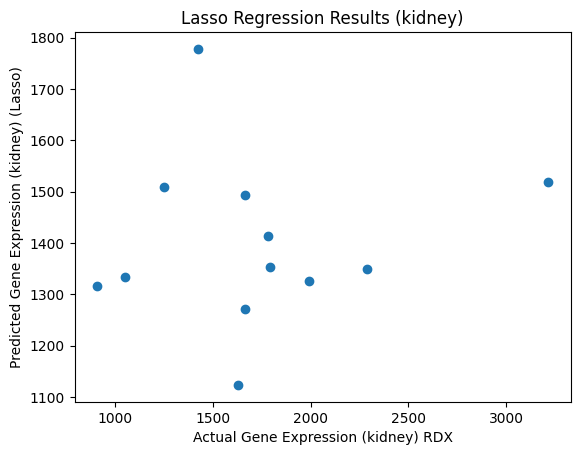

In [ ]:
# Loop over the genes
for gene_name in top_five_genes_kidney_names:
    # Select the target gene for this iteration
    y_lasso_kidney = cancerous_kidney_df_common[gene_name]  # Gene expression data

    # Select the features (CNA data) for this gene
    X_lasso_kidney = kidney_cnv_copy

    # Split your data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_lasso_kidney, y_lasso_kidney, test_size=0.2, random_state=42)

    # Initialize Lasso regression model
    lasso_reg_kidney = Lasso(alpha=1.0)  # You can adjust the alpha (penalty) parameter

    # Fit Lasso regression model
    lasso_reg_kidney.fit(X_train, y_train)

    # Make predictions using the trained model
    lasso_predictions_kidney = lasso_reg_kidney.predict(X_test)

    # Calculate Mean Squared Error for Lasso predictions
    lasso_mse_kidney = mean_squared_error(y_test, lasso_predictions_kidney)

    # Print the Lasso MSE
    print(f"Lasso MSE for {gene_name}: {lasso_mse_kidney}")

    # Create a DataFrame to store model summary
    summary_df_kidney = pd.DataFrame()
    summary_df_kidney['Feature'] = X_lasso_kidney.columns
    summary_df_kidney['Coefficient'] = lasso_reg_kidney.coef_

    # Filter out non-zero coefficients
    nonzero_summary_df_kidney = summary_df_kidney[summary_df_kidney['Coefficient'] != 0]

    # Print the non-zero coefficients for each gene
    print(f"Non-zero coefficients for {gene_name}:\n{nonzero_summary_df_kidney}")

    plt.scatter(y_test, lasso_predictions_kidney)
    plt.xlabel(f"Actual Gene Expression (kidney) {gene_name}")
    plt.ylabel("Predicted Gene Expression (kidney) (Lasso)")
    plt.title("Lasso Regression Results (kidney)")
    plt.show()
    ''''
    # Write the summary and Lasso MSE to a text file for each gene
    with open(f'Lasso_regression_results_Kidney_gene_{gene_name}.txt', 'w') as f:
        f.write(f"Lasso MSE for {gene_name}: {lasso_mse_kidney}\n\n")
        f.write(nonzero_summary_df_kidney.to_string(index=False))
        '''


## <font color='#097770'>***VII. Exporting The Results***</font>

In [ ]:
# # Define the path for the CSV file
# csv_path = 'corrected-wilcoxon-significant-kidney.csv'

# # Write wilcoxon_significant_kidney to the CSV file
# with open(csv_path, 'w', newline='') as csvfile:
#     fieldnames = ['Gene', 'Test Statistic', 'p-value', 'Adjusted p-value']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()

#     for gene, test_statistic, p_value, adj_p_value in wilcoxon_significant_kidney:
#         writer.writerow({'Gene': gene, 'Test Statistic': test_statistic, 'p-value': p_value, 'Adjusted p-value': adj_p_value})

# # Define the path for the TXT file
# txt_path = 'wilcoxon-significant-kidney.txt'

# # Write wilcoxon_significant_kidney to the TXT file
# with open(txt_path, 'w') as txtfile:
#     for gene, test_statistic, p_value, adj_p_value in wilcoxon_significant_kidney:
#         txtfile.write(f"Gene: {gene}, Test Statistic: {test_statistic}, p-value: {p_value}, Adjusted p-value: {adj_p_value}\n")

# print("Exported wilcoxon_significant_kidney as CSV and TXT files.")